In [14]:
import numpy as np
import pandas as pd
import scipy

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Анализ транскриптов генов gapdh и gapdhs в образцах меланомы

In [2]:
transcripts = pd.read_csv('./transcripts - TPM_mel+nev.csv')
transcripts

,sample_SRR,type_of_tissue,transcript_ID,chromosome,strand,start_pos,end_pos,number_of_exons,TPM
0,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH1 (ENST00000496049),chr12,+,6534512,6535141,2,1.575493
1,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH2 (ENST00000229239),chr12,+,6534517,6538374,9,920.101929
2,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH3 (ENST00000396856),chr12,+,6534532,6538374,9,171.943039
3,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH4 (ENST00000492719),chr12,+,6534533,6537996,8,0.598639
4,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH5 (ENST00000396861),chr12,+,6534534,6538374,9,94.857643
...,...,...,...,...,...,...,...,...,...
931,SRR6916925_GSM3071672_BO.017.BU.018_N,N2,GAPDH-DT (ENST00000537921),chr12,-,6532290,6533498,2,0.000000
932,SRR6916925_GSM3071672_BO.017.BU.018_N,N2,GAPDHS1 (ENST00000586334),chr19,+,35533455,35543026,6,0.000000
933,SRR6916925_GSM3071672_BO.017.BU.018_N,N2,GAPDHS2 (ENST00000222286),chr19,+,35533456,35545599,11,0.000000
934,SRR6916925_GSM3071672_BO.017.BU.018_N,N2,GAPDHS3 (ENST00000585510),chr19,+,35536783,35543026,6,4.727840


Создал для начала таблицу, содержащую только информацию об образце, транскриптах в этих образцах и значениях TPM соотв-х транскриптов.

In [3]:
cols = ['type_of_tissue', 'strand', 'start_pos', 'end_pos', 'number_of_exons', 'chromosome']
tpm_t = transcripts.drop(cols, axis=1)
tpm_t

,sample_SRR,transcript_ID,TPM
0,SRR6916907_GSM3071654_LE.039.BE_M,GAPDH1 (ENST00000496049),1.575493
1,SRR6916907_GSM3071654_LE.039.BE_M,GAPDH2 (ENST00000229239),920.101929
2,SRR6916907_GSM3071654_LE.039.BE_M,GAPDH3 (ENST00000396856),171.943039
3,SRR6916907_GSM3071654_LE.039.BE_M,GAPDH4 (ENST00000492719),0.598639
4,SRR6916907_GSM3071654_LE.039.BE_M,GAPDH5 (ENST00000396861),94.857643
...,...,...,...
931,SRR6916925_GSM3071672_BO.017.BU.018_N,GAPDH-DT (ENST00000537921),0.000000
932,SRR6916925_GSM3071672_BO.017.BU.018_N,GAPDHS1 (ENST00000586334),0.000000
933,SRR6916925_GSM3071672_BO.017.BU.018_N,GAPDHS2 (ENST00000222286),0.000000
934,SRR6916925_GSM3071672_BO.017.BU.018_N,GAPDHS3 (ENST00000585510),4.727840


## Кросстаблицы

Создал кросс-таблицы типа образец ткани - транскрипт по TPM, FPKM и cov, чтобы наглядно показать нулевые значения соответствующих метрик.

In [4]:
tpm = pd.crosstab(tpm_t.transcript_ID, tpm_t.sample_SRR, values = tpm_t.TPM, aggfunc='sum')
def color_negative_red(val):
    color = 'red' if val == 0 else ''
    return 'background-color: %s' % color 

tpm.style.applymap(color_negative_red)

sample_SRR,SRR6916886_GSM3071633_LE.063.SP.064_N,SRR6916887_GSM3071634_LE.117.RB.118_N,SRR6916888_GSM3071635_FKH.021.022_N,SRR6916889_GSM3071636_LE.081.TR.082_N,SRR6916890_GSM3071637_BO.001.SH.002_N,SRR6916893_GSM3071640_LE.037.RG.038_N,SRR6916895_GSM3071642_LE.029.SE.030_N,SRR6916897_GSM3071644_LE.021.TH.022_N,SRR6916898_GSM3071645_FKH.027.028_N,SRR6916900_GSM3071647_LE.129.NG_M,SRR6916902_GSM3071649_LE.117.RB_M,SRR6916903_GSM3071650_LE.037.RG_M,SRR6916904_GSM3071651_KO.679_M,SRR6916907_GSM3071654_LE.039.BE_M,SRR6916914_GSM3071661_KO.1031_M,SRR6916917_GSM3071664_LE.025.BI_M_,SRR6916918_GSM3071665_KO.971_M,SRR6916920_GSM3071667_MA.001.SH_M,SRR6916921_GSM3071668_LE.049.SDI_M,SRR6916922_GSM3071669_LE.049.SDII_M,SRR6916924_GSM3071671_LE.049.SDIII_M,SRR6916925_GSM3071672_BO.017.BU.018_N,SRR6916926_GSM3071673_BO.005.SA.006_N,SRR6916928_GSM3071675_LE.105.TF.106_N,SRR6916929_GSM3071676_FKH.008.010_N,SRR6916931_GSM3071678_BO.015.BW.016_N,SRR6916933_GSM3071680_BO.013.NK.014_N,SRR6916934_GSM3071681_LE.041.RL.042_N,SRR6916935_GSM3071682_LE.045.WU_M,SRR6916936_GSM3071683_BO.023.HS_M,SRR6916937_GSM3071684_FKH.021_M,SRR6916938_GSM3071685_LE.105.TF_M,SRR6916939_GSM3071686_FKH.012_M,SRR6916943_GSM3071690_FKH.011_M,SRR6916944_GSM3071691_BO.001.SH_2_M,SRR6916945_GSM3071692_FKH.027_M,SRR6916946_GSM3071693_FKH.023_M,SRR6916947_GSM3071694_BO.019.WG_M,SRR6916948_GSM3071695_BO.015.BW_M,SRR6916949_GSM3071696_BO.017.BU_M,SRR6916952_GSM3071699_BO.013.NK_M,SRR6916954_GSM3071701_BO.025.SE_M,SRR6916955_GSM3071702_LE.081.TR_M,SRR6916956_GSM3071703_LE.041.RL_M,SRR6916957_GSM3071704_LE.057.HK_M,SRR6916958_GSM3071705_KO.1221_M,SRR6916959_GSM3071706_LE.051.WD_M,SRR6916960_GSM3071707_KO.762.SW_M,SRR6916961_GSM3071708_FKH.007_M,SRR6916962_GSM3071709_LE.085.BU_M,SRR6916964_GSM3071711_BO.027.SM_M,SRR6916965_GSM3071712_LE.073.HK_M
transcript_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GAPDH-DT (ENST00000537921),0.000000,0.000000,0.000000,0.000000,0.121082,0.293467,0.000000,0.000000,0.000000,0.000000,0.426012,0.293467,0.000000,0.000000,0.410548,0.152624,0.202273,0.000000,0.114421,0.296994,0.297601,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.218709,0.000000,0.000000,0.000000,0.366704,0.212824,0.051763,0.118398,0.000000,0.243048,0.066787,0.254388,0.241461,0.813308,0.000000,0.000000,0.000000,0.133867,0.239326
GAPDH1 (ENST00000496049),1.865138,2.061610,2.159141,1.603385,1.138827,1.528322,1.459408,1.162594,1.255497,1.472993,3.306427,2.127090,1.455760,1.575493,2.111585,2.705438,2.153028,3.306427,5.844157,3.556144,5.978585,1.242940,1.150182,0.647893,2.144775,3.228870,2.206242,1.035804,1.419923,4.007756,2.275774,2.061766,1.352143,2.551225,0.002767,5.219173,2.001667,2.958036,2.591721,2.038832,2.861835,1.768138,1.532284,1.269557,4.187799,3.752224,1.422917,2.097309,1.649884,4.868958,1.584689,3.191051
GAPDH10 (ENST00000396858),0.531321,0.267620,0.383364,0.116419,10.714849,0.667795,0.602228,0.371599,0.675096,0.264163,117.412979,0.451523,0.059455,1.658868,28.783886,1.311696,36.212395,117.412979,172.293900,183.444092,230.843185,0.198276,0.115307,0.223245,0.581854,1.337274,0.792827,0.513981,0.346165,1.519674,0.536181,0.464854,0.301728,26.059471,0.000000,1.310750,46.201504,49.757946,54.139610,54.190948,64.106781,29.368391,0.083061,7.558829,41.929428,165.734131,41.322319,21.892771,0.824700,104.539444,87.881088,0.906338
GAPDH11 (ENST00000619601),0.019274,0.024904,0.002951,0.008638,0.022495,0.018538,0.004677,0.012510,0.021682,0.013617,0.035743,0.009025,0.000000,0.019145,0.015691,0.059294,0.072425,0.035743,0.151804,0.131697,0.137612,0.003345,0.005778,0.004308,0.014088,0.032261,0.023284,0.021338,0.012568,0.038685,0.018231,0.002204,0.021041,0.031223,0.000000,0.022072,0.006505,0.038094,0.021706,0.019586,0.066570,0.017731,0.020037,0.019597,0.050173,0.028015,0.007146,0.012342,0.014389,0.035318,0.010131,0.040663
GAPDH2 (ENST00000229239),1803.445679,2448.952148,1697.278076,486.045532,2099.939941,1292.837158,1926.49206

In [5]:
fpkm = pd.crosstab(transcripts.transcript_ID, transcripts.sample_SRR, values = transcripts.FPKM, aggfunc='sum')
def color_negative_red(val):
    color = 'red' if val == 0 else ''
    return 'background-color: %s' % color 

fpkm.style.applymap(color_negative_red)

AttributeError: 'DataFrame' object has no attribute 'FPKM'

In [ ]:
cov = pd.crosstab(transcripts.transcript_ID, transcripts.sample_SRR, values = transcripts.coverty, aggfunc='mean')
def color_negative_red(val):
    color = 'red' if val == 0 else ''
    return 'background-color: %s' % color 

cov.style.applymap(color_negative_red)

## Значения TPM в образцах в разных транскриптах 

<Figure size 1080x720 with 0 Axes>

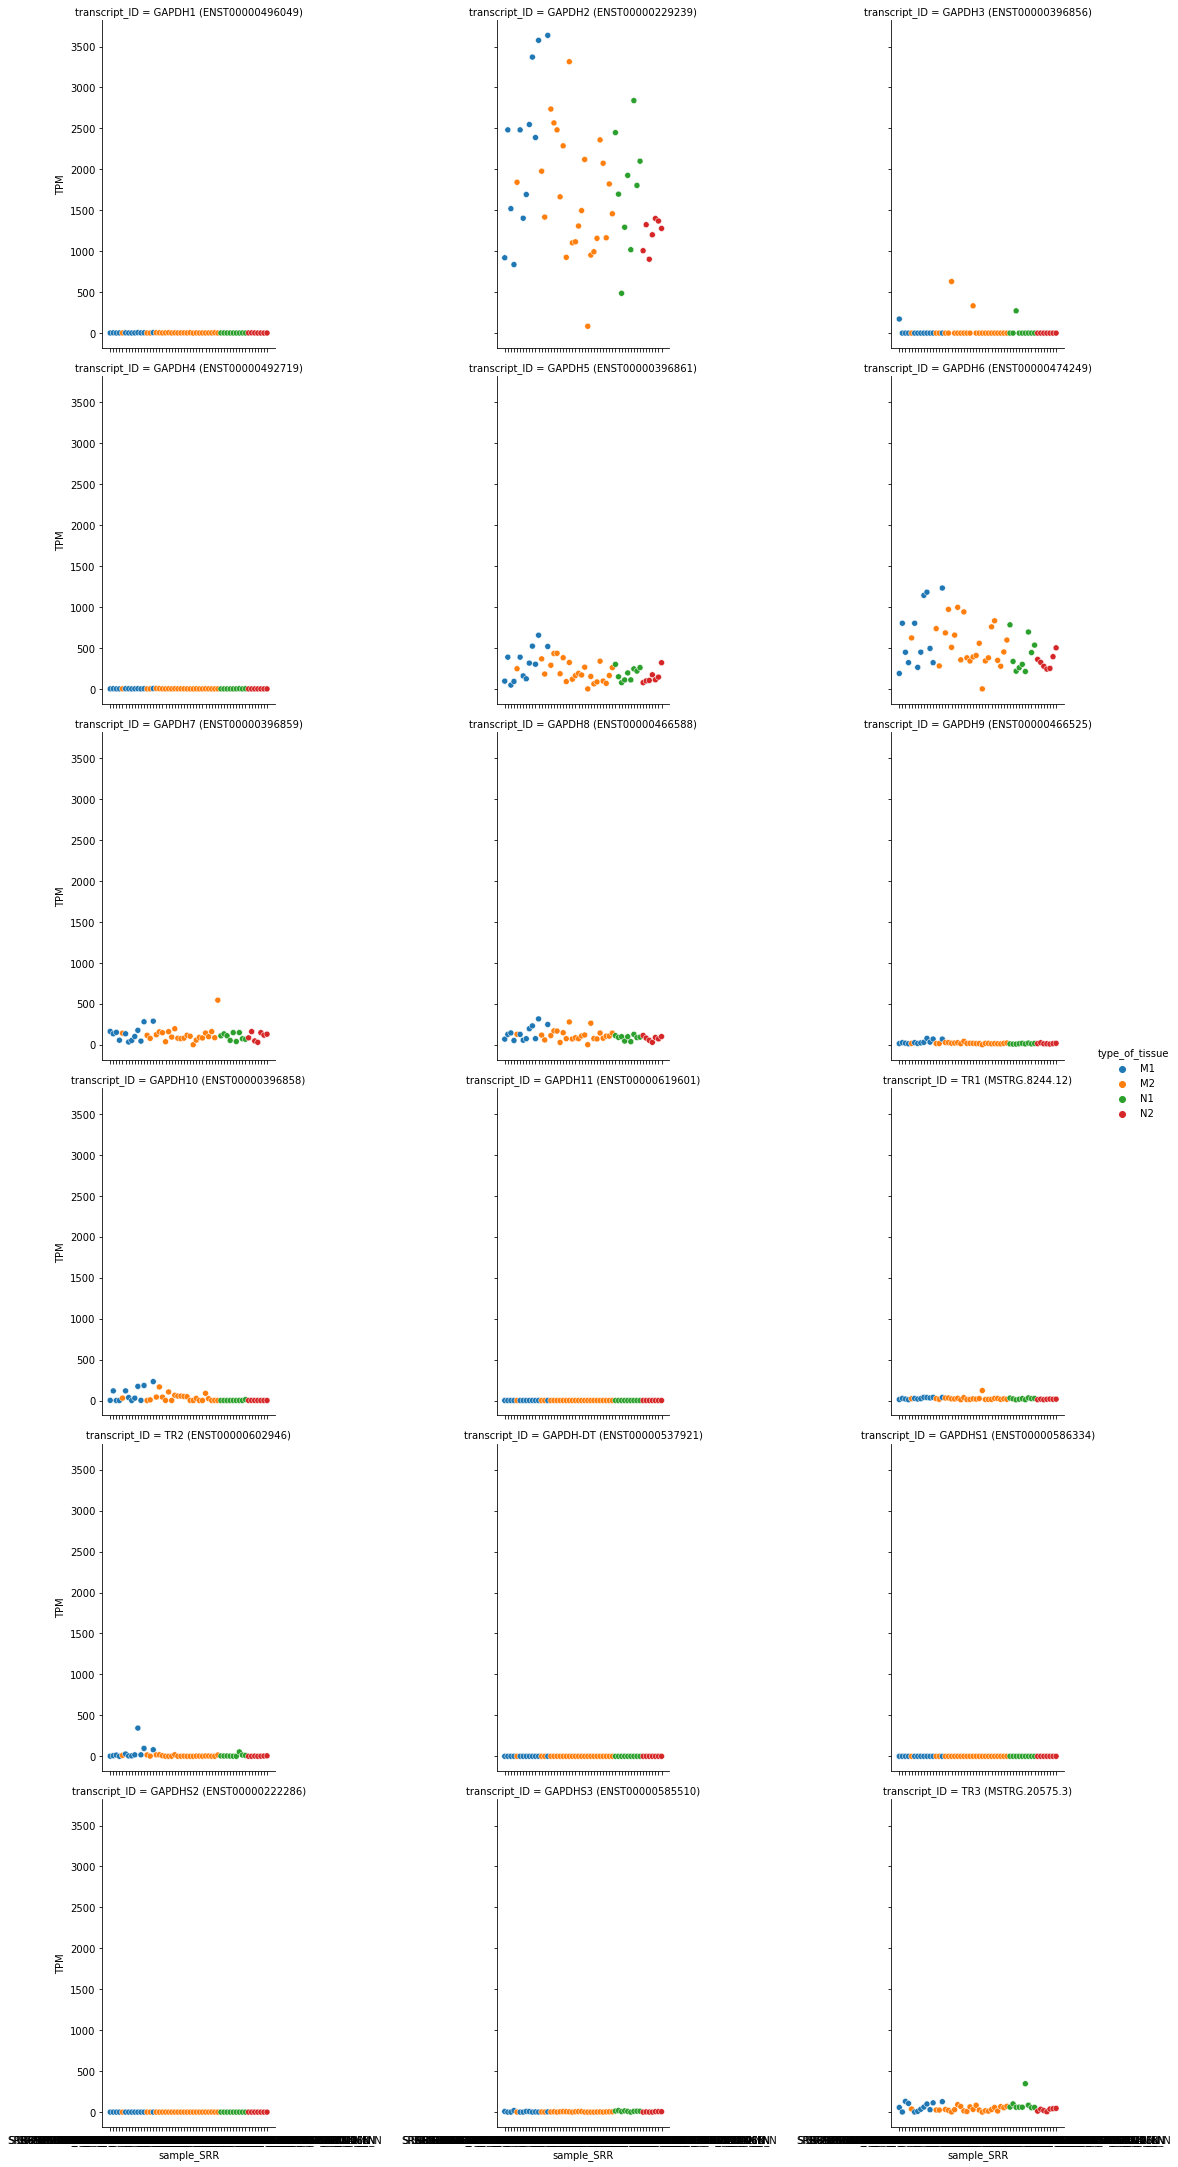

In [6]:
plt.figure(figsize=(15,10))
tpmm = sns.relplot(data=transcripts, x="sample_SRR", y="TPM", col='transcript_ID', hue="type_of_tissue",col_wrap=3)
plt.show()

## Распеделение значений TPM в образцах в разных транскриптах 

<Figure size 1080x720 with 0 Axes>

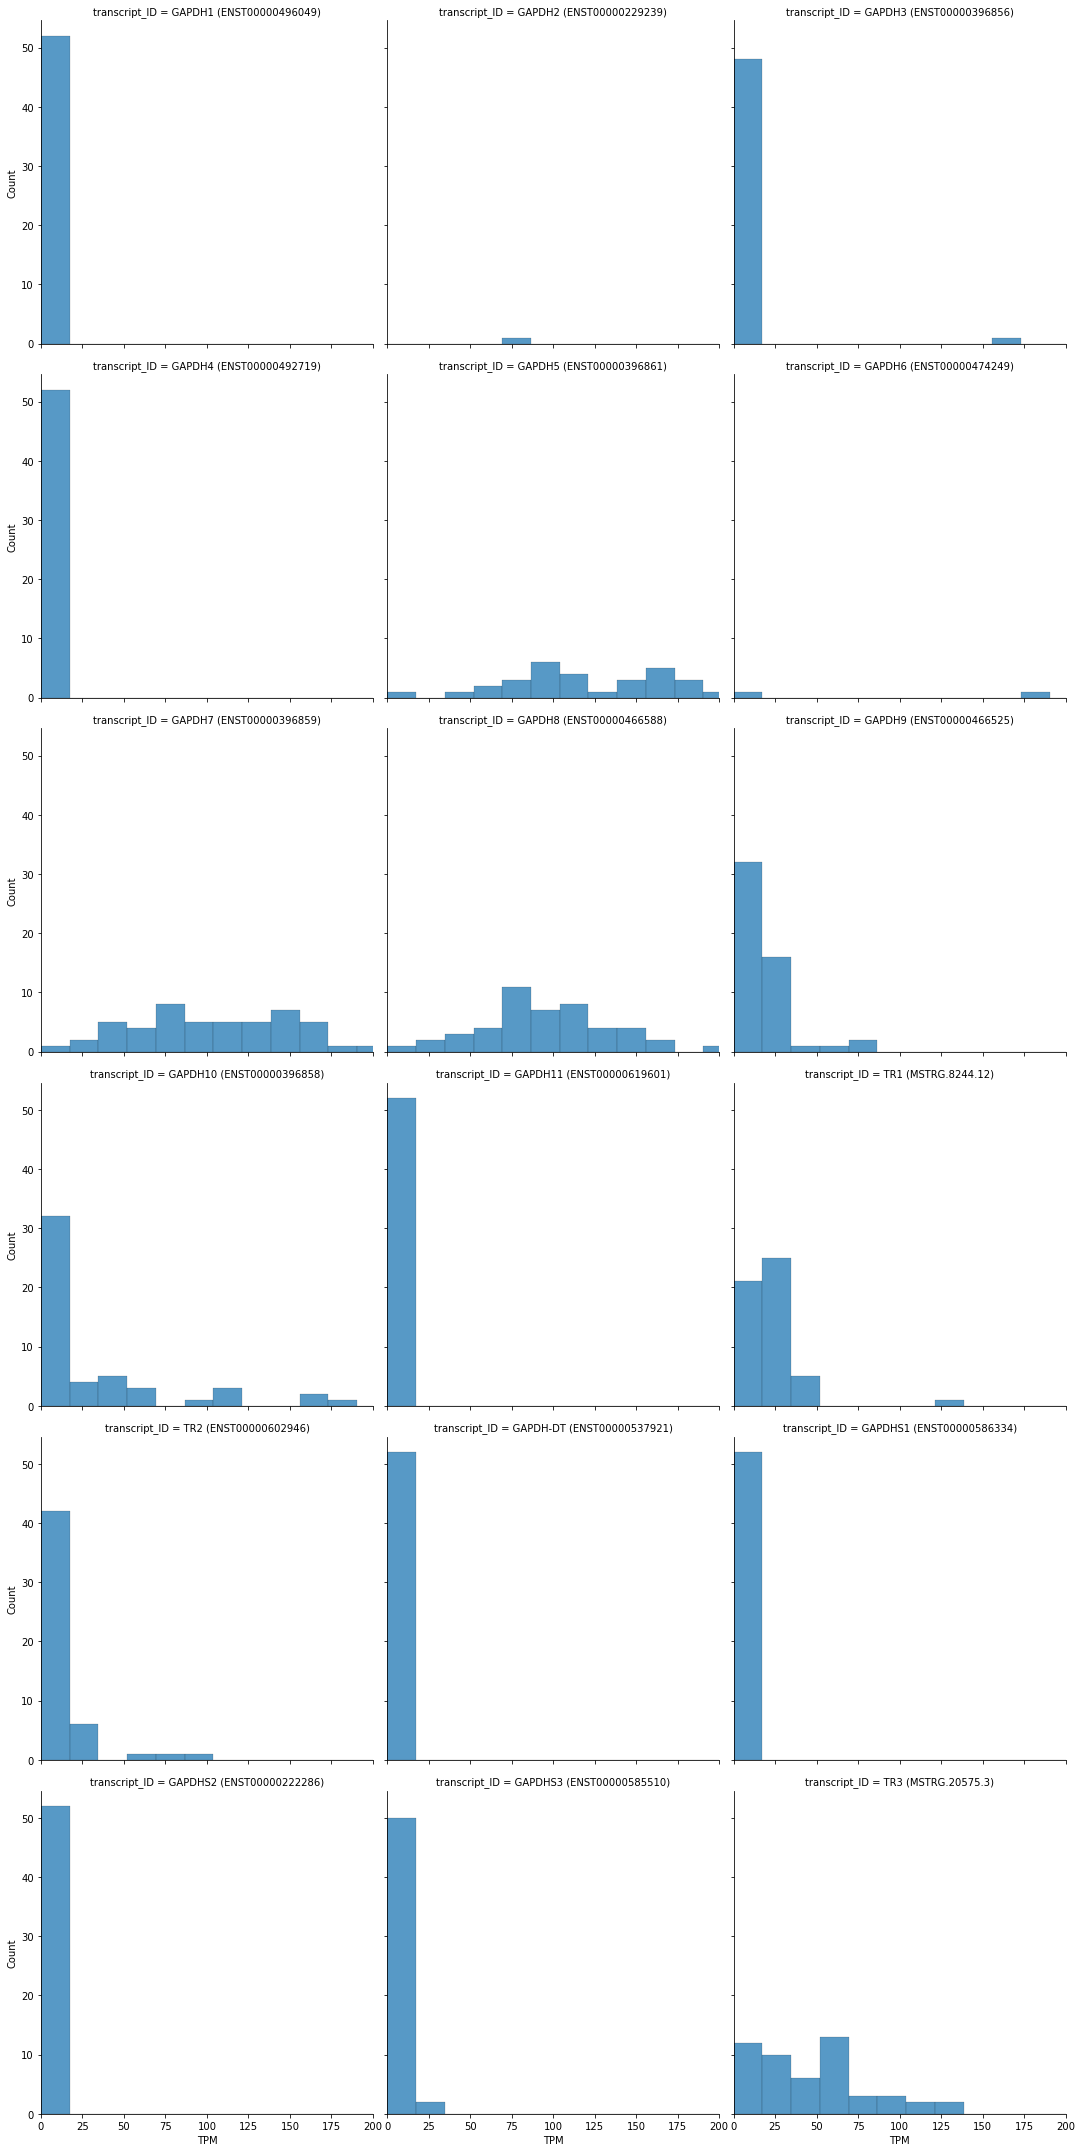

In [7]:
plt.figure(figsize=(15,10))
disttpm = sns.displot(data=transcripts, x="TPM", col='transcript_ID', col_wrap=3)
#plt.yscale('log')
#plt.xscale('log')
plt.xlim(0,200)
plt.show()

## Значения FPKM в образцах в разных транскриптах 

In [8]:
plt.figure(figsize=(15,10))
fpkmm = sns.relplot(data=transcripts, x="sample_SRR", y="FPKM", col='transcript_ID', hue="type_of_tissue",col_wrap=3)
plt.show()

ValueError: Could not interpret value `FPKM` for parameter `y`

<Figure size 1080x720 with 0 Axes>

## Распеделение значений FPKM в образцах в разных транскриптах 

In [ ]:
plt.figure(figsize=(15,10))
disttpm = sns.displot(data=transcripts, x="FPKM", col='transcript_ID', col_wrap=3)
plt.yscale('log')
plt.xscale('log')
plt.xlim(0,200)
plt.show()

## Значения cov в образцах в разных транскриптах 

In [ ]:
plt.figure(figsize=(15,10))
covv = sns.relplot(data=transcripts, x="sample_SRR", y="coverty", col='transcript_ID', hue="type_of_tissue",col_wrap=3)
plt.show()

### Вывод: исходя из графиков выше, выделил 3 самых "выделяющихся" транскриптов (gapdh2, 5 и 6). И среди транскриптов gapdhs выделил 2 самых выделяющихся: TR3 и GAPDHS3

Далее для этих транскриптов я построил боксплоты значений TPM, FPKM и cov соответственно.

## TPM in GAPDH2,5,6

In [8]:
gapdh5 = transcripts[transcripts.transcript_ID == "GAPDH5 (ENST00000396861)"]
gapdh2 = transcripts[transcripts.transcript_ID == "GAPDH2 (ENST00000229239)"]
gapdh6 = transcripts[transcripts.transcript_ID == "GAPDH6 (ENST00000474249)"]
gapdhs = transcripts[transcripts.transcript_ID == "TR3 (MSTRG.20575.3)"]
gapdhs3 = transcripts[transcripts.transcript_ID == "GAPDHS3 (ENST00000585510)"]

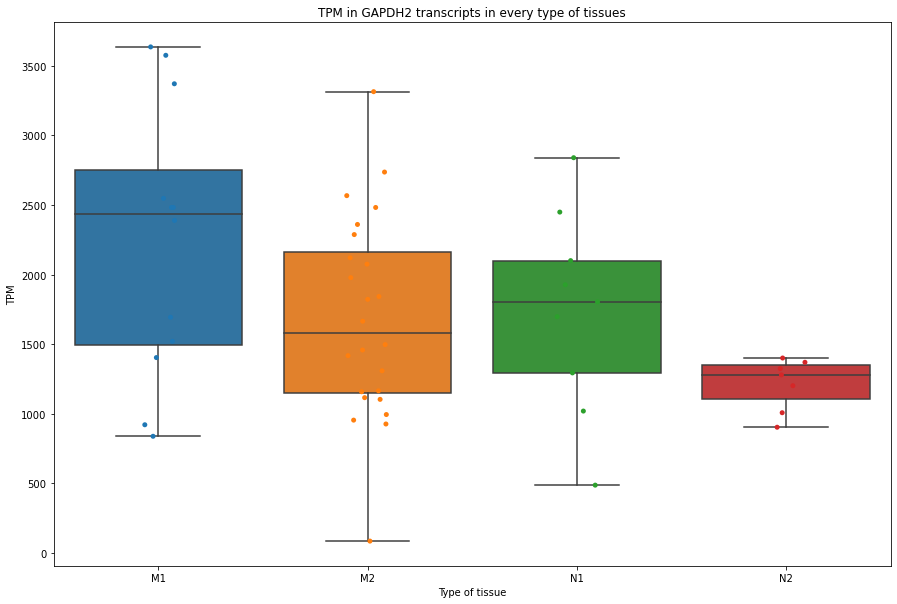

In [9]:
plt.figure(figsize=(15,10))
sns.boxplot(data=gapdh2, x='type_of_tissue',y='TPM')
sns.stripplot(data=gapdh2, x='type_of_tissue',y='TPM')
plt.title("TPM in GAPDH2 transcripts in every type of tissues")
plt.ylabel("TPM")
plt.xlabel("Type of tissue")
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=gapdh5, x='type_of_tissue',y='TPM')
sns.stripplot(data=gapdh5, x='type_of_tissue',y='TPM')
plt.title("TPM in GAPDH5 transcripts in every type of tissues")
plt.ylabel("TPM")
plt.xlabel("Type of tissue")
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=gapdh6, x='type_of_tissue',y='TPM')
sns.stripplot(data=gapdh6, x='type_of_tissue',y='TPM')
plt.title("TPM in GAPDH6 transcripts in every type of tissues")
plt.ylabel("TPM")
plt.xlabel("Type of tissue")
plt.show()

## FPKM in GAPDH2,5,6

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=gapdh2, x='type_of_tissue',y='FPKM')
sns.stripplot(data=gapdh2, x='type_of_tissue',y='FPKM')
plt.title("FPKM in GAPDH2 transcripts in every type of tissues")
plt.ylabel("FPKM")
plt.xlabel("Type of tissue")
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=gapdh5, x='type_of_tissue',y='FPKM')
sns.stripplot(data=gapdh5, x='type_of_tissue',y='FPKM')
plt.title("FPKM in GAPDH5 transcripts in every type of tissues")
plt.ylabel("FPKM")
plt.xlabel("Type of tissue")
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=gapdh6, x='type_of_tissue',y='FPKM')
sns.stripplot(data=gapdh6, x='type_of_tissue',y='FPKM')
plt.title("FPKM in GAPDH6 transcripts in every type of tissues")
plt.ylabel("FPKM")
plt.xlabel("Type of tissue")
plt.show()

## COV in GAPDH2,5,6

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=gapdh2, x='type_of_tissue',y='coverty')
sns.stripplot(data=gapdh2, x='type_of_tissue',y='coverty')
plt.title("cov in GAPDH2 transcripts in every type of tissues")
plt.ylabel("cov")
plt.xlabel("Type of tissue")
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=gapdh5, x='type_of_tissue',y='coverty')
sns.stripplot(data=gapdh5, x='type_of_tissue',y='coverty')
plt.title("cov in GAPDH5 transcripts in every type of tissues")
plt.ylabel("cov")
plt.xlabel("Type of tissue")
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=gapdh6, x='type_of_tissue',y='coverty')
sns.stripplot(data=gapdh6, x='type_of_tissue',y='coverty')
plt.title("cov in GAPDH6 transcripts in every type of tissues")
plt.ylabel("cov")
plt.xlabel("Type of tissue")
plt.show()

## TPM, FPKM, cov in TR3 (MSTRG.20575.3) 

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=gapdhs, x='type_of_tissue',y='coverty')
sns.stripplot(data=gapdhs, x='type_of_tissue',y='coverty')
plt.title("cov in TR3 (MSTRG.20575.3) transcripts in every type of tissues")
plt.ylabel("cov")
plt.xlabel("Type of tissue")
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=gapdhs, x='type_of_tissue',y='TPM')
sns.stripplot(data=gapdhs, x='type_of_tissue',y='TPM')
plt.title("TPM in TR3 (MSTRG.20575.3) transcripts in every type of tissues")
plt.ylabel("TPM")
plt.xlabel("Type of tissue")
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=gapdhs, x='type_of_tissue',y='FPKM')
sns.stripplot(data=gapdhs, x='type_of_tissue',y='FPKM')
plt.title("FPKM in TR3 (MSTRG.20575.3) transcripts in every type of tissues")
plt.ylabel("FPKM")
plt.xlabel("Type of tissue")
plt.show()

## TPM, FPKM, cov in GAPDHS3

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=gapdhs3, x='type_of_tissue',y='coverty')
sns.stripplot(data=gapdhs3, x='type_of_tissue',y='coverty')
plt.title("cov in GAPDHS3 transcripts in every type of tissues")
plt.ylabel("cov")
plt.xlabel("Type of tissue")
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=gapdhs3, x='type_of_tissue',y='TPM')
sns.stripplot(data=gapdhs3, x='type_of_tissue',y='TPM')
plt.title("TPM in GAPDHS3 transcripts in every type of tissues")
plt.ylabel("TPM")
plt.xlabel("Type of tissue")
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=gapdhs3, x='type_of_tissue',y='FPKM')
sns.stripplot(data=gapdhs3, x='type_of_tissue',y='FPKM')
plt.title("FPKM in GAPDHS3 transcripts in every type of tissues")
plt.ylabel("FPKM")
plt.xlabel("Type of tissue")
plt.show()

## Кол-во 0вых значений TPM, FPKM, cov в транскриптах


Ранее я сделал кросс-таблицы по значениям этих 3х метрик, на которых выделил нулевые значения красным. Теперь можно посчитать их долю в транскриптах.

In [ ]:
trs = transcripts.transcript_ID.unique()
trs

In [ ]:
for i in range(0,18):
    cnt_nul = 0
    for k in transcripts[transcripts['transcript_ID']== trs[i]]['TPM']:
        if k == 0:
            cnt_nul +=1
    print("Доля нулевых транскриптов ", trs[i], "во всех образцах составляет {}%".format(cnt_nul/40*100))

# Distribution of TPM

In [ ]:
plt.figure(figsize=(15,10))
histt = sns.displot(transcripts, x="TPM")
plt.yscale('log')
plt.xscale('log')
#plt.ylim(0, 500)
#plt.xlim(-1,5000)
plt.title("TPM distribution in selected GAPDH and GAPDHS transcripts in all selected samples")
histt

<Figure size 1080x720 with 0 Axes>

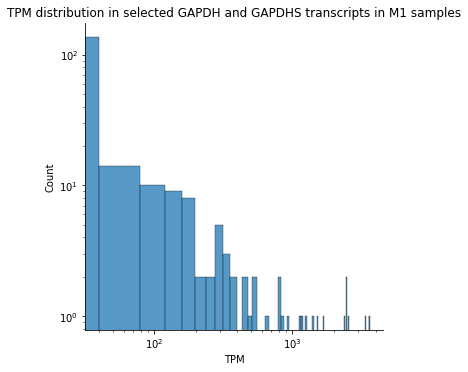

In [12]:
plt.figure(figsize=(15,10))
histm1 = sns.displot(transcripts[transcripts['type_of_tissue']=='M1'], x="TPM")
plt.yscale('log')
plt.xscale('log')
#plt.ylim(0, 150)
#plt.xlim(-1,2000)
plt.title("TPM distribution in selected GAPDH and GAPDHS transcripts in M1 samples")
histm1

<Figure size 1080x720 with 0 Axes>

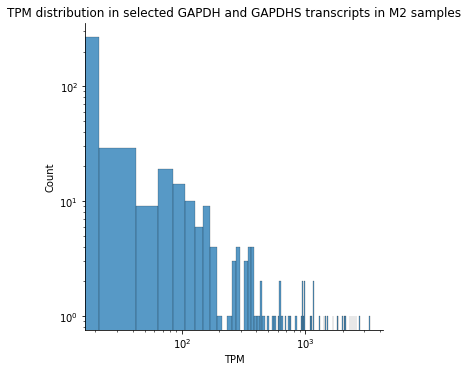

In [13]:
plt.figure(figsize=(15,10))
histm2 = sns.displot(transcripts[transcripts['type_of_tissue']=='M2'], x="TPM")
plt.yscale('log')
plt.xscale('log')
#plt.ylim(0, 300)
#plt.xlim(-1,2000)
plt.title("TPM distribution in selected GAPDH and GAPDHS transcripts in M2 samples")
histm2

In [14]:
transcripts.transcript_ID.unique()

array(['GAPDH1 (ENST00000496049)', 'GAPDH2 (ENST00000229239)',
       'GAPDH3 (ENST00000396856)', 'GAPDH4 (ENST00000492719)',
       'GAPDH5 (ENST00000396861)', 'GAPDH6 (ENST00000474249)',
       'GAPDH7 (ENST00000396859)', 'GAPDH8 (ENST00000466588)',
       'GAPDH9 (ENST00000466525)', 'GAPDH10 (ENST00000396858)',
       'GAPDH11 (ENST00000619601)', 'TR1 (MSTRG.8244.12)',
       'TR2 (ENST00000602946)', 'GAPDH-DT (ENST00000537921)',
       'GAPDHS1 (ENST00000586334)', 'GAPDHS2 (ENST00000222286)',
       'GAPDHS3 (ENST00000585510)', 'TR3 (MSTRG.20575.3)'], dtype=object)

In [5]:
gapdh_ts = ['GAPDH1 (ENST00000496049)', 'GAPDH2 (ENST00000229239)',
       'GAPDH3 (ENST00000396856)', 'GAPDH4 (ENST00000492719)',
       'GAPDH5 (ENST00000396861)', 'GAPDH6 (ENST00000474249)',
       'GAPDH7 (ENST00000396859)', 'GAPDH8 (ENST00000466588)',
       'GAPDH9 (ENST00000466525)', 'GAPDH10 (ENST00000396858)',
       'GAPDH11 (ENST00000619601)', 'TR1 (MSTRG.8244.12)',
       'TR2 (ENST00000602946)']

In [9]:
gapdh = transcripts[transcripts['transcript_ID'].isin(gapdh_ts)]

<Figure size 1080x720 with 0 Axes>

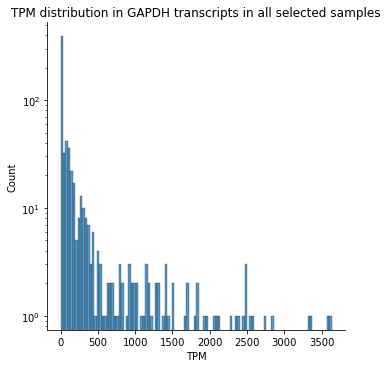

In [10]:
plt.figure(figsize=(15,10))
histt = sns.displot(gapdh, x="TPM")
plt.yscale('log')
#plt.xscale('log')
#plt.ylim(0, 500)
#plt.xlim(-1,5000)
plt.title("TPM distribution in GAPDH transcripts in all selected samples")
histt

In [11]:
gapdhs_ts = ['GAPDHS1 (ENST00000586334)', 'GAPDHS2 (ENST00000222286)',
       'GAPDHS3 (ENST00000585510)', 'TR3 (MSTRG.20575.3)']

In [12]:
gapdhs = transcripts[transcripts['transcript_ID'].isin(gapdhs_ts)]

<Figure size 1080x720 with 0 Axes>

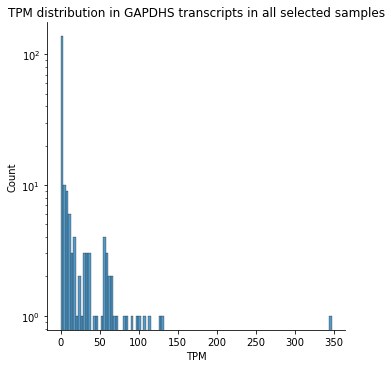

In [13]:
plt.figure(figsize=(15,10))
histt = sns.displot(gapdhs, x="TPM")
plt.yscale('log')
#plt.xscale('log')
#plt.ylim(0, 500)
#plt.xlim(-1,5000)
plt.title("TPM distribution in GAPDHS transcripts in all selected samples")
histt

# Стат анализ

Для начала проверим наши данные на нормальность. Сделаю это с помощью теста Шапиро-Уилка, в котором нулевая гипотеза — образец имеет гауссово распределение, а альтернативная — не имеет. Уровень значимости я взял 5%.

### GAPDH5

In [ ]:
from scipy.stats import shapiro
stat, p = shapiro(list(gapdh5[gapdh5.type_of_tissue == 'M1']['TPM']))
print('P-value: {}'.format(p))
print('Statistic value: {}'.format(stat))

In [ ]:
from scipy.stats import shapiro
stat, p = shapiro(list(gapdh5[gapdh5.type_of_tissue == 'M2']['TPM']))
print('P-value: {}'.format(p))
print('Statistic value: {}'.format(stat))

### GAPDH2

In [ ]:
from scipy.stats import shapiro
stat, p = shapiro(list(gapdh2[gapdh2.type_of_tissue == 'M1']['TPM']))
print('P-value: {}'.format(p))
print('Statistic value: {}'.format(stat))

In [ ]:
from scipy.stats import shapiro
stat, p = shapiro(list(gapdh2[gapdh2.type_of_tissue == 'M2']['TPM']))
print('P-value: {}'.format(p))
print('Statistic value: {}'.format(stat))

### GAPDH6

In [ ]:
from scipy.stats import shapiro
stat, p = shapiro(list(gapdh6[gapdh6.type_of_tissue == 'M1']['TPM']))
print('P-value: {}'.format(p))
print('Statistic value: {}'.format(stat))

In [ ]:
from scipy.stats import shapiro
stat, p = shapiro(list(gapdh6[gapdh6.type_of_tissue == 'M2']['TPM']))
print('P-value: {}'.format(p))
print('Statistic value: {}'.format(stat))

### TR3

In [ ]:
from scipy.stats import shapiro
stat, p = shapiro(list(gapdhs[gapdhs.type_of_tissue == 'M1']['TPM']))
print('P-value: {}'.format(p))
print('Statistic value: {}'.format(stat))

In [ ]:
from scipy.stats import shapiro
stat, p = shapiro(list(gapdhs[gapdhs.type_of_tissue == 'M2']['TPM']))
print('P-value: {}'.format(p))
print('Statistic value: {}'.format(stat))

### GAPDHS3

In [ ]:
from scipy.stats import shapiro
stat, p = shapiro(list(gapdhs3[gapdhs3.type_of_tissue == 'M1']['TPM']))
print('P-value: {}'.format(p))
print('Statistic value: {}'.format(stat))

In [ ]:
from scipy.stats import shapiro
stat, p = shapiro(list(gapdhs3[gapdhs3.type_of_tissue == 'M2']['TPM']))
print('P-value: {}'.format(p))
print('Statistic value: {}'.format(stat))

В большинстве случаев P-values больше уровня значимости (0.05), что говорит нам о том, что у нас нет достаточно оснований отвергнуть нулевую гипотезу. Следовательно, мы можем принять наши распределения за нормальные. Поэтому по-хорошему далее надо использовать t-тест.

Но есть 2 случая, когда значения ТРМ распределены ненормально (на уровне значимости 0.05 у нас достаточно оснований отвергнуть нулевую гипотезу). Это случаи GAPDHS3. 

Поэтому будет правильнее использовать 1 тест на все данные: U-тест.

В качетве нулевой гипотезы была взята гипотеза о том, что значения ТРМ мутантов не отличаются от ТРМ дикого типа, альтернативная — отличаются. Уровень значимости — 5%.

### GAPDH5

In [ ]:
scipy.stats.mannwhitneyu(list(gapdh5[gapdh5.type_of_tissue == 'M1']['TPM']), list(gapdh5[gapdh5.type_of_tissue == 'M2']['TPM']))

На 5% уровне значимости у нас недостаточно оснований отвергнуть нулевую гипотезу об отсутствии отличий между значениями ТРМ M2 меланом и ТРМ M1 меланом.

### GAPDH2

In [ ]:
scipy.stats.mannwhitneyu(list(gapdh2[gapdh2.type_of_tissue == 'M1']['TPM']), list(gapdh2[gapdh2.type_of_tissue == 'M2']['TPM']))

На 5% уровне значимости у нас недостаточно оснований отвергнуть нулевую гипотезу об отсутствии отличий между значениями ТРМ M2 меланом и ТРМ M1 меланом.

### GAPDH6

In [ ]:
scipy.stats.mannwhitneyu(list(gapdh6[gapdh6.type_of_tissue == 'M1']['TPM']), list(gapdh6[gapdh6.type_of_tissue == 'M2']['TPM']))

На 5% уровне значимости у нас недостаточно оснований отвергнуть нулевую гипотезу об отсутствии отличий между значениями ТРМ M2 меланом и ТРМ M1 меланом.

### TR3

In [ ]:
scipy.stats.mannwhitneyu(list(gapdhs[gapdhs.type_of_tissue == 'M1']['TPM']), list(gapdhs[gapdhs.type_of_tissue == 'M2']['TPM']))

На 5% уровне значимости у нас недостаточно оснований отвергнуть нулевую гипотезу об отсутствии отличий между значениями ТРМ M2 меланом и ТРМ M1 меланом.

### GAPDHS3

In [ ]:
scipy.stats.mannwhitneyu(list(gapdhs3[gapdhs3.type_of_tissue == 'M1']['TPM']), list(gapdhs3[gapdhs3.type_of_tissue == 'M2']['TPM']))

На 5% уровне значимости у нас недостаточно оснований отвергнуть нулевую гипотезу об отсутствии отличий между значениями ТРМ M2 меланом и ТРМ M1 меланом.

# GAPDH vs GAPDHS

In [22]:
GDF = pd.concat([gapdh.assign(gene='GAPDH'), gapdhs.assign(gene='GAPDHS')])
GDF

,sample_SRR,type_of_tissue,transcript_ID,chromosome,strand,start_pos,end_pos,number_of_exons,TPM,gene
0,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH1 (ENST00000496049),chr12,+,6534512,6535141,2,1.575493,GAPDH
1,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH2 (ENST00000229239),chr12,+,6534517,6538374,9,920.101929,GAPDH
2,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH3 (ENST00000396856),chr12,+,6534532,6538374,9,171.943039,GAPDH
3,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH4 (ENST00000492719),chr12,+,6534533,6537996,8,0.598639,GAPDH
4,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH5 (ENST00000396861),chr12,+,6534534,6538374,9,94.857643,GAPDH
...,...,...,...,...,...,...,...,...,...,...
917,SRR6916928_GSM3071675_LE.105.TF.106_N,N2,TR3 (MSTRG.20575.3),chr19,+,35536592,35547526,16,42.065189,GAPDHS
932,SRR6916925_GSM3071672_BO.017.BU.018_N,N2,GAPDHS1 (ENST00000586334),chr19,+,35533455,35543026,6,0.000000,GAPDHS
933,SRR6916925_GSM3071672_BO.017.BU.018_N,N2,GAPDHS2 (ENST00000222286),chr19,+,35533456,35545599,11,0.000000,GAPDHS
934,SRR6916925_GSM3071672_BO.017.BU.018_N,N2,GAPDHS3 (ENST00000585510),chr19,+,35536783,35543026,6,4.727840,GAPDHS


In [23]:
GDF_ed = GDF.drop(GDF[GDF['transcript_ID'] == 'TR3 (MSTRG.20575.3)'].index)

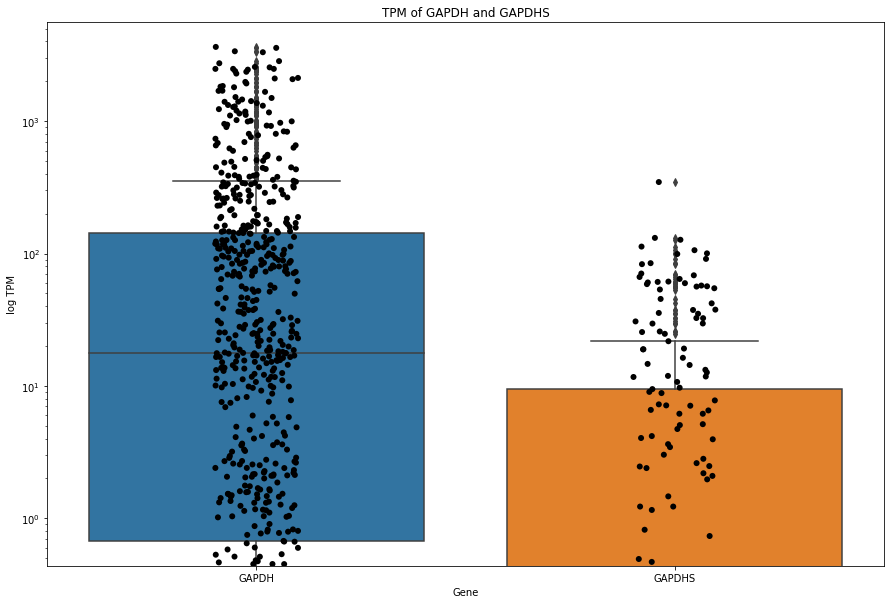

In [15]:
plt.figure(figsize=(15,10))
sns.boxplot(data=GDF, x = 'gene', y='TPM')
sns.stripplot(data=GDF, x = 'gene', y='TPM', size=6, color='black')
plt.title("TPM of GAPDH and GAPDHS")
plt.yscale('log')
plt.ylabel("log TPM")
plt.xlabel("Gene")
plt.show()

## Сумма ТРМ в пределах образца

### Все образцы (все невусы+все меланомы)

In [24]:
tpmsum = pd.crosstab(GDF.sample_SRR, GDF_ed.gene, values = GDF_ed.TPM, aggfunc='sum')
def color_negative_red(val):
    color = 'red' if val == 0 else ''
    return 'background-color: %s' % color 

tpmsum.style.applymap(color_negative_red)

gene,GAPDH,GAPDHS
sample_SRR,,
SRR6916886_GSM3071633_LE.063.SP.064_N,2675.266404,11.787888
SRR6916887_GSM3071634_LE.117.RB.118_N,3797.041000,12.648592
SRR6916888_GSM3071635_FKH.021.022_N,2435.848744,18.920738
SRR6916889_GSM3071636_LE.081.TR.082_N,1279.490800,6.593504
SRR6916890_GSM3071637_BO.001.SH.002_N,3120.161123,10.722717
SRR6916893_GSM3071640_LE.037.RG.038_N,1790.432847,14.669950
SRR6916895_GSM3071642_LE.029.SE.030_N,2710.293226,9.019649
SRR6916897_GSM3071644_LE.021.TH.022_N,1439.054784,0.062004
SRR6916898_GSM3071645_FKH.027.028_N,4164.470907,9.701429


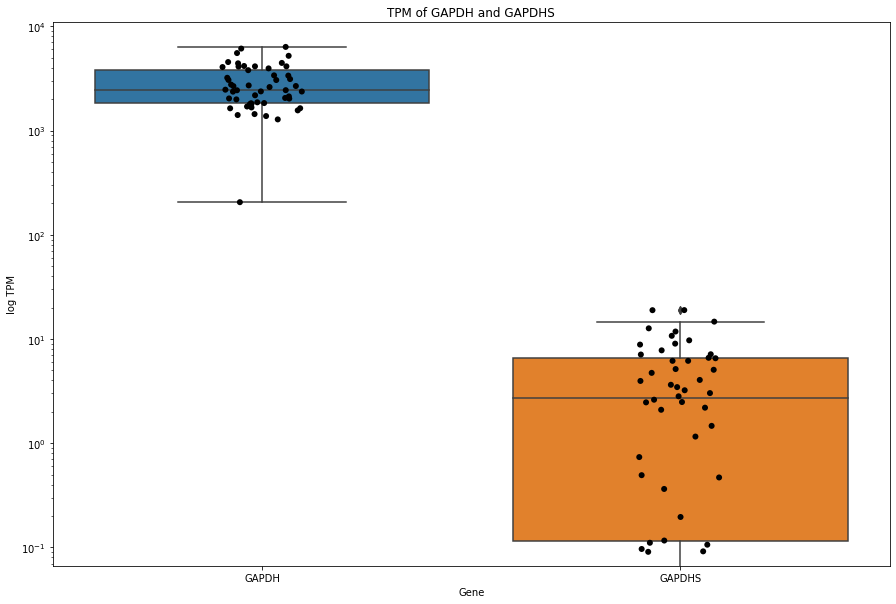

In [25]:
plt.figure(figsize=(15,10))
sns.boxplot(data=tpmsum)
sns.stripplot(data=tpmsum, size=6, color='black')
plt.title("TPM of GAPDH and GAPDHS")
plt.yscale('log')
plt.ylabel("log TPM")
plt.xlabel("Gene")
plt.show()

### Все образцы меланом

In [26]:
tpmsum_mel = pd.crosstab(GDF_ed[GDF_ed['type_of_tissue'].isin(['M1', 'M2'])].sample_SRR, GDF_ed[GDF_ed['type_of_tissue'].isin(['M1', 'M2'])].gene, values = GDF_ed[GDF_ed['type_of_tissue'].isin(['M1', 'M2'])].TPM, aggfunc='sum')
def color_negative_red(val):
    color = 'red' if val == 0 else ''
    return 'background-color: %s' % color 

tpmsum_mel.style.applymap(color_negative_red)

gene,GAPDH,GAPDHS
sample_SRR,,
SRR6916900_GSM3071647_LE.129.NG_M,2440.572740,8.832843
SRR6916902_GSM3071649_LE.117.RB_M,4132.682959,0.000000
SRR6916903_GSM3071650_LE.037.RG_M,1377.530186,18.890335
SRR6916904_GSM3071651_KO.679_M,2362.809799,0.090644
SRR6916907_GSM3071654_LE.039.BE_M,1637.050615,7.775856
SRR6916914_GSM3071661_KO.1031_M,4417.441545,7.090195
SRR6916917_GSM3071664_LE.025.BI_M_,3386.452764,2.190881
SRR6916918_GSM3071665_KO.971_M,1990.744108,0.091587
SRR6916920_GSM3071667_MA.001.SH_M,4112.162908,0.000000


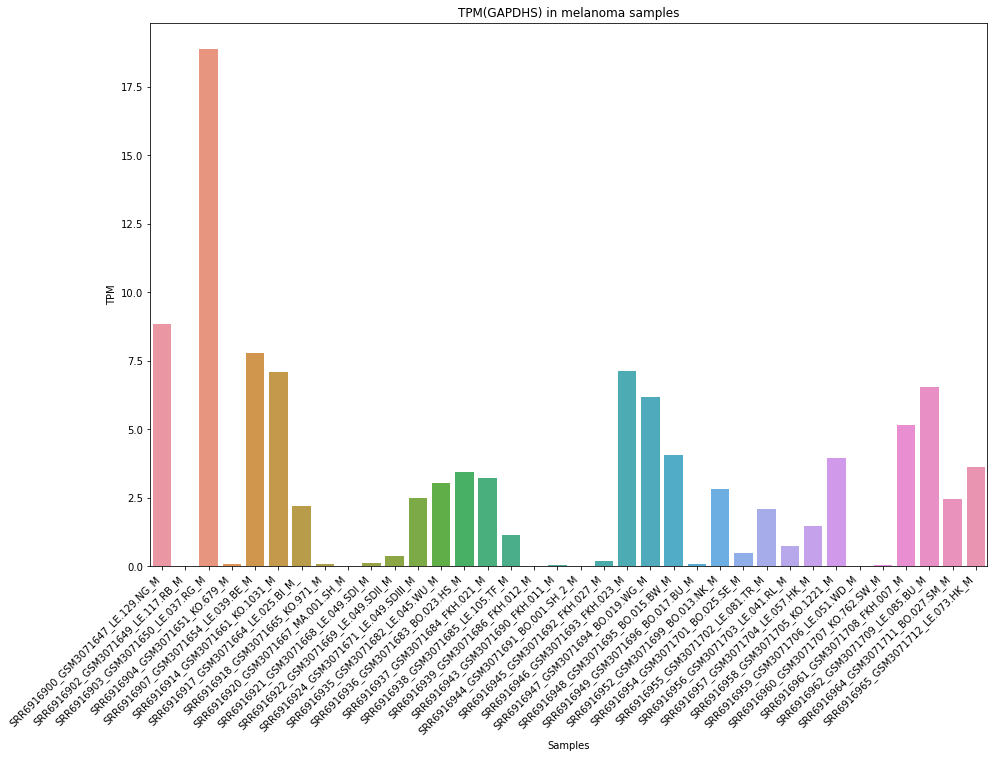

In [27]:
plt.figure(figsize=(15,10))
sns.barplot(data=tpmsum_mel, y=tpmsum_mel['GAPDHS'], x = crtab_mel.index)
#sns.stripplot(data=tpmsum, size=6, color='black')
plt.title("TPM(GAPDHS)/TPM(GAPDH) in melanoma samples")
#plt.yscale('log')
plt.ylabel("TPM")
plt.xlabel("Samples")
plt.xticks(rotation=45, ha='right')
plt.show()

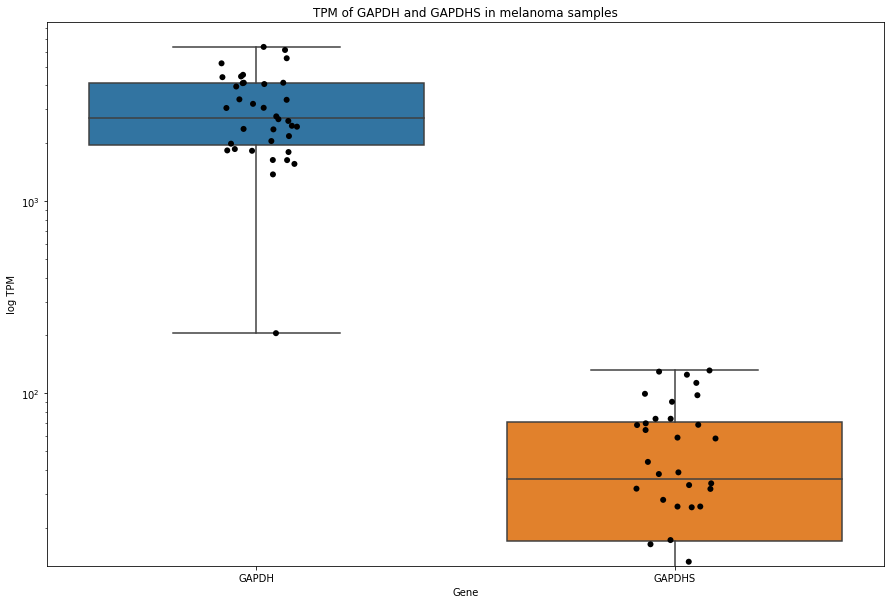

In [19]:
plt.figure(figsize=(15,10))
sns.boxplot(data=tpmsum_mel)
sns.stripplot(data=tpmsum_mel, size=6, color='black')
plt.title("TPM of GAPDH and GAPDHS in melanoma samples")
plt.yscale('log')
plt.ylabel("log TPM")
plt.xlabel("Gene")
plt.show()

### Все образцы невусов

In [15]:
tpmsum_nev = pd.crosstab(GDF[GDF['type_of_tissue'].isin(['N1', 'N2'])].sample_SRR, GDF[GDF['type_of_tissue'].isin(['N1', 'N2'])].gene, values = GDF[GDF['type_of_tissue'].isin(['N1', 'N2'])].TPM, aggfunc='sum')
def color_negative_red(val):
    color = 'red' if val == 0 else ''
    return 'background-color: %s' % color 

tpmsum_nev.style.applymap(color_negative_red)

gene,GAPDH,GAPDHS
sample_SRR,,
SRR6916886_GSM3071633_LE.063.SP.064_N,2675.266404,65.273373
SRR6916887_GSM3071634_LE.117.RB.118_N,3797.041000,73.708010
SRR6916888_GSM3071635_FKH.021.022_N,2435.848744,119.241722
SRR6916889_GSM3071636_LE.081.TR.082_N,1279.490800,65.346228
SRR6916890_GSM3071637_BO.001.SH.002_N,3120.161123,68.042659
SRR6916893_GSM3071640_LE.037.RG.038_N,1790.432847,75.158884
SRR6916895_GSM3071642_LE.029.SE.030_N,2710.293226,68.762680
SRR6916897_GSM3071644_LE.021.TH.022_N,1439.054784,346.790153
SRR6916898_GSM3071645_FKH.027.028_N,4164.470907,94.284940


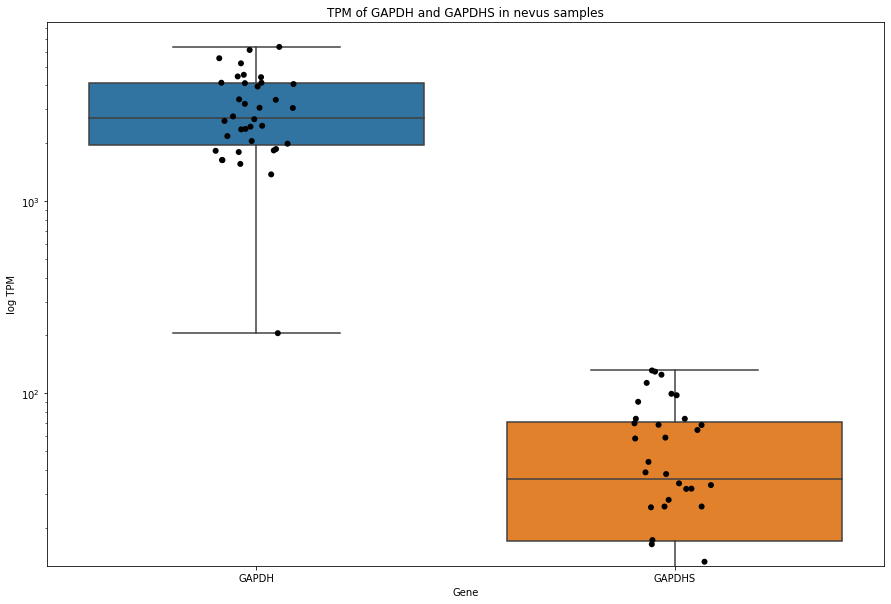

In [16]:
plt.figure(figsize=(15,10))
sns.boxplot(data=tpmsum_mel)
sns.stripplot(data=tpmsum_mel, size=6, color='black')
plt.title("TPM of GAPDH and GAPDHS in nevus samples")
plt.yscale('log')
plt.ylabel("log TPM")
plt.xlabel("Gene")
plt.show()

### Разделение по всем типам

In [17]:
tpmsumge_mel = pd.crosstab(index=GDF.sample_SRR, columns=[GDF.type_of_tissue, GDF.gene], values = GDF.TPM, aggfunc='sum')
def color_negative_red(val):
    color = 'red' if val == 0 else ''
    return 'background-color: %s' % color 

tpmsumge_mel.style.applymap(color_negative_red)

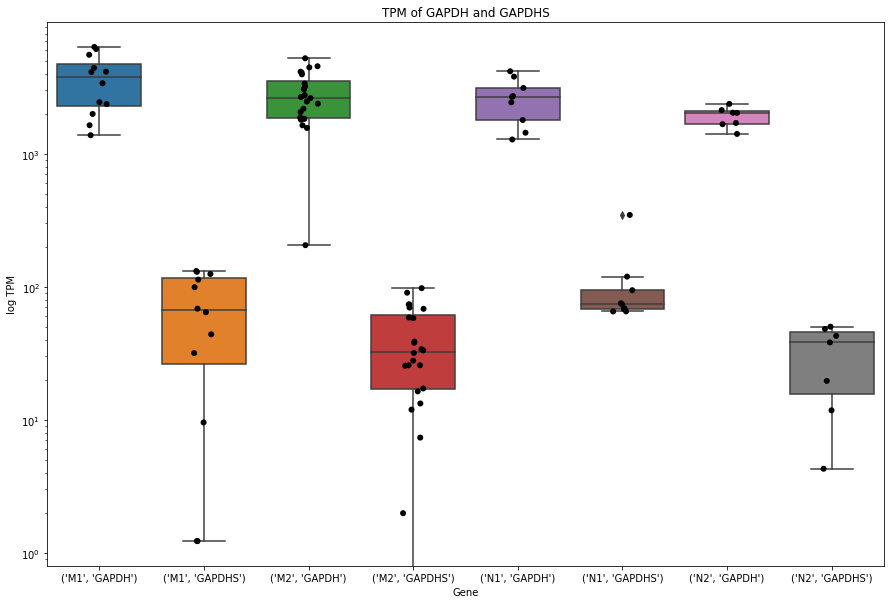

In [18]:
plt.figure(figsize=(15,10))
sns.boxplot(data=tpmsumge_mel)
sns.stripplot(data=tpmsumge_mel, size=6, color='black')
plt.title("TPM of GAPDH and GAPDHS")
plt.yscale('log')
plt.ylabel("log TPM")
plt.xlabel("Gene")
plt.show()

# OCM1 & PIG1

In [4]:
transcripts_cl = pd.read_csv('./transcripts - TPM_cl.csv')
transcripts_cl

,sample_SRR,type_of_tissue,transcript_ID,chromosome,strand,start_pos,end_pos,number_of_exons,TPM
0,SRR11658491_mRNA-seq_of_homo_sapiens_OCM1,OCM1,GAPDH1 (ENST00000496049),chr12,+,6534512,6535141,2,25.828016
1,SRR11658491_mRNA-seq_of_homo_sapiens_OCM1,OCM1,GAPDH2 (ENST00000229239),chr12,+,6534517,6538374,9,9858.530273
2,SRR11658491_mRNA-seq_of_homo_sapiens_OCM1,OCM1,GAPDH3 (ENST00000396856),chr12,+,6534532,6538374,9,4.136660
3,SRR11658491_mRNA-seq_of_homo_sapiens_OCM1,OCM1,GAPDH4 (ENST00000492719),chr12,+,6534533,6537996,8,0.000000
4,SRR11658491_mRNA-seq_of_homo_sapiens_OCM1,OCM1,GAPDH5 (ENST00000396861),chr12,+,6534534,6538374,9,712.816956
...,...,...,...,...,...,...,...,...,...
265,SRR14683915_RNA-Seq_of_human_melanocytes_cell_...,PIG1,GAPDH-DT (ENST00000537921),chr12,+,6532290,6533498,2,0.000000
266,SRR14683915_RNA-Seq_of_human_melanocytes_cell_...,PIG1,GAPDHS1 (ENST00000586334),chr19,-,35533455,35543026,6,0.000000
267,SRR14683915_RNA-Seq_of_human_melanocytes_cell_...,PIG1,GAPDHS2 (ENST00000222286),chr19,-,35533456,35545599,11,0.000000
268,SRR14683915_RNA-Seq_of_human_melanocytes_cell_...,PIG1,GAPDHS3 (ENST00000585510),chr19,+,35536783,35543026,6,0.000000


In [5]:
transcripts_cl[transcripts_cl.transcript_ID=='GAPDHS3 (ENST00000585510)']

,sample_SRR,type_of_tissue,transcript_ID,chromosome,strand,start_pos,end_pos,number_of_exons,TPM
16,SRR11658491_mRNA-seq_of_homo_sapiens_OCM1,OCM1,GAPDHS3 (ENST00000585510),chr19,+,35536783,35543026,6,0.000000
34,SRR11658492_mRNA-seq_of_homo_sapiens_OCM1,OCM1,GAPDHS3 (ENST00000585510),chr19,+,35536783,35543026,6,0.018698
52,SRR11658493_mRNA-seq_of_homo_sapiens_OCM1,OCM1,GAPDHS3 (ENST00000585510),chr19,+,35536783,35543026,6,0.027322
70,SRR11658494_mRNA-seq_of_homo_sapiens_OCM1,OCM1,GAPDHS3 (ENST00000585510),chr19,+,35536783,35543026,6,0.000000
88,SRR11658495_mRNA-seq_of_homo_sapiens_OCM1,OCM1,GAPDHS3 (ENST00000585510),chr19,+,35536783,35543026,6,0.000000
106,SRR11658496_mRNA-seq_of_homo_sapiens_OCM1,OCM1,GAPDHS3 (ENST00000585510),chr19,+,35536783,35543026,6,0.000000
124,SRR11658497_mRNA-seq_of_homo_sapiens_OCM1,OCM1,GAPDHS3 (ENST00000585510),chr19,+,35536783,35543026,6,0.000000
142,SRR11658498_mRNA-seq_of_homo_sapiens_OCM1,OCM1,GAPDHS3 (ENST00000585510),chr19,+,35536783,35543026,6,0.000000
160,SRR11658499_mRNA-seq_of_homo_sapiens_OCM1,OCM1,GAPDHS3 (ENST00000585510),chr19,+,35536783,35543026,6,0.000000
178,SRR11658500_mRNA-seq_of_homo_sapiens_OCM1,OCM1,GAPDHS3 (ENST00000585510),chr19,+,35536783,35543026,6,0.000000


In [20]:
cols = ['type_of_tissue', 'strand', 'start_pos', 'end_pos', 'number_of_exons', 'chromosome']
tpm_t_cl = transcripts_cl.drop(cols, axis=1)
tpm_t_cl

,sample_SRR,transcript_ID,TPM
0,SRR11658491_mRNA-seq_of_homo_sapiens_OCM1,GAPDH1 (ENST00000496049),25.828016
1,SRR11658491_mRNA-seq_of_homo_sapiens_OCM1,GAPDH2 (ENST00000229239),9858.530273
2,SRR11658491_mRNA-seq_of_homo_sapiens_OCM1,GAPDH3 (ENST00000396856),4.136660
3,SRR11658491_mRNA-seq_of_homo_sapiens_OCM1,GAPDH4 (ENST00000492719),0.000000
4,SRR11658491_mRNA-seq_of_homo_sapiens_OCM1,GAPDH5 (ENST00000396861),712.816956
...,...,...,...
265,SRR14683915_RNA-Seq_of_human_melanocytes_cell_...,GAPDH-DT (ENST00000537921),0.000000
266,SRR14683915_RNA-Seq_of_human_melanocytes_cell_...,GAPDHS1 (ENST00000586334),0.000000
267,SRR14683915_RNA-Seq_of_human_melanocytes_cell_...,GAPDHS2 (ENST00000222286),0.000000
268,SRR14683915_RNA-Seq_of_human_melanocytes_cell_...,GAPDHS3 (ENST00000585510),0.000000


In [21]:
tpm_cl = pd.crosstab(tpm_t_cl.transcript_ID, tpm_t_cl.sample_SRR, values = tpm_t_cl.TPM, aggfunc='sum')
def color_negative_red(val):
    color = 'red' if val == 0 else ''
    return 'background-color: %s' % color 

tpm_cl.style.applymap(color_negative_red)

sample_SRR,SRR11658491_mRNA-seq_of_homo_sapiens_OCM1,SRR11658492_mRNA-seq_of_homo_sapiens_OCM1,SRR11658493_mRNA-seq_of_homo_sapiens_OCM1,SRR11658494_mRNA-seq_of_homo_sapiens_OCM1,SRR11658495_mRNA-seq_of_homo_sapiens_OCM1,SRR11658496_mRNA-seq_of_homo_sapiens_OCM1,SRR11658497_mRNA-seq_of_homo_sapiens_OCM1,SRR11658498_mRNA-seq_of_homo_sapiens_OCM1,SRR11658499_mRNA-seq_of_homo_sapiens_OCM1,SRR11658500_mRNA-seq_of_homo_sapiens_OCM1,SRR11658501_mRNA-seq_of_homo_sapiens_OCM1,SRR11658502_mRNA-seq_of_homo_sapiens_OCM,SRR14683911_RNA-Seq_of_human_melanocytes_cell_line,SRR14683914_RNA-Seq_of_human_melanocytes_cell_line,SRR14683915_RNA-Seq_of_human_melanocytes_cell_line
transcript_ID,,,,,,,,,,,,,,,
GAPDH-DT (ENST00000537921),0.592868,0.000000,0.000000,0.293467,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.592868,0.000000,0.000000
GAPDH1 (ENST00000496049),25.828016,10.147079,13.590012,27.785616,12.239961,11.030732,9.968898,21.249483,19.013390,20.107971,11.391310,29.896341,2.159124,2.756180,1.694799
GAPDH10 (ENST00000396858),287.012848,269.348877,359.858002,431.279144,318.168701,232.032639,336.425659,420.996704,346.192657,555.309326,297.849548,360.733246,475.516327,321.094971,529.708862
GAPDH11 (ENST00000619601),0.267116,0.102847,0.067940,0.213537,0.044894,0.096374,0.084086,0.203740,0.195080,0.196698,0.078115,0.248656,0.091413,0.131753,0.156578
GAPDH2 (ENST00000229239),9858.530273,5138.864258,5375.867188,9632.772461,4767.971191,5065.834473,5227.596191,9444.947266,9359.350586,9487.918945,5078.531250,9645.947266,4602.958496,4564.150879,4590.535645
GAPDH3 (ENST00000396856),4.136660,2.137281,3.242564,4.629620,2.495407,1.916484,1.999630,3.364927,2.854759,3.092175,2.372413,2.298673,0.000000,0.000000,0.000000
GAPDH4 (ENST00000492719),0.000000,0.000000,1.835948,0.000000,0.000000,4.099491,3.128941,3.974093,2.029572,0.000000,0.590707,3.032768,0.000000,0.000000,0.000000
GAPDH5 (ENST00000396861),712.816956,478.110565,429.843018,977.708008,406.128967,486.862549,451.985077,751.134644,911.506958,830.509277,530.451721,857.398254,962.354675,1098.505859,981.353577
GAPDH6 (ENST00000474249),482.992981,415.381836,327.016571,453.230743,285.376953,281.193451,267.250916,523.698486,755.913391,761.651733,360.859985,402.056305,204.839371,150.100006,138.909348


## Значения TPM в образцах в разных транскриптах 

<Figure size 1080x720 with 0 Axes>

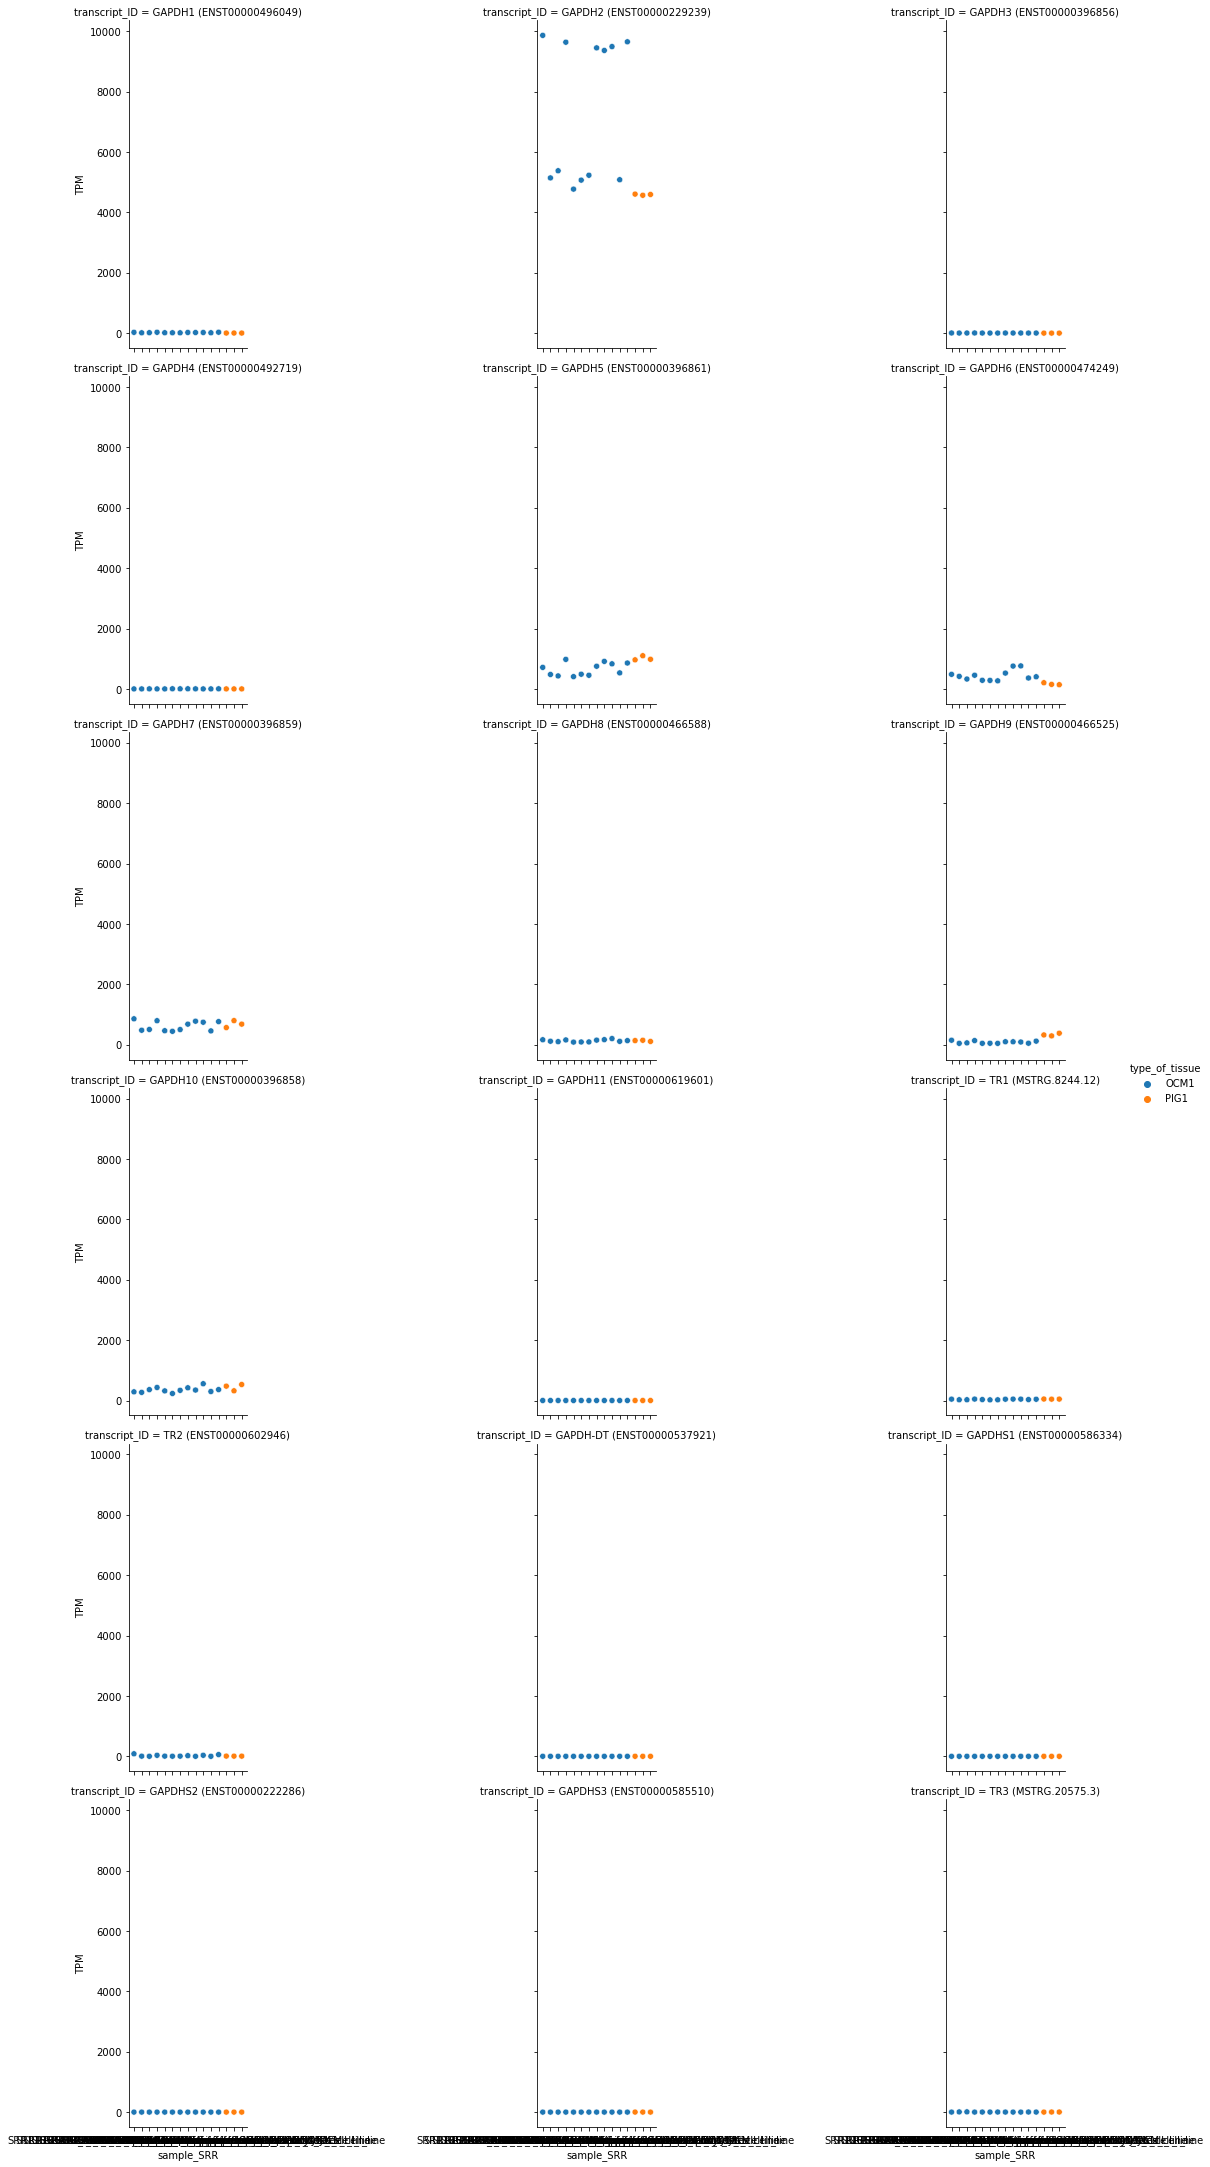

In [22]:
plt.figure(figsize=(15,10))
tpmm_cl = sns.relplot(data=transcripts_cl, x="sample_SRR", y="TPM", col='transcript_ID', hue="type_of_tissue",col_wrap=3)
plt.show()

## Сумма ТРМ в пределах образца

In [4]:
gapdh_ts = ['GAPDH1 (ENST00000496049)', 'GAPDH2 (ENST00000229239)',
       'GAPDH3 (ENST00000396856)', 'GAPDH4 (ENST00000492719)',
       'GAPDH5 (ENST00000396861)', 'GAPDH6 (ENST00000474249)',
       'GAPDH7 (ENST00000396859)', 'GAPDH8 (ENST00000466588)',
       'GAPDH9 (ENST00000466525)', 'GAPDH10 (ENST00000396858)',
       'GAPDH11 (ENST00000619601)', 'TR1 (MSTRG.8244.12)',
       'TR2 (ENST00000602946)']

In [5]:
gapdh_cl = transcripts_cl[transcripts_cl['transcript_ID'].isin(gapdh_ts)]

NameError: name 'transcripts_cl' is not defined

In [6]:
gapdhs_ts = ['GAPDHS1 (ENST00000586334)', 'GAPDHS2 (ENST00000222286)',
       'GAPDHS3 (ENST00000585510)', 'TR3 (MSTRG.20575.3)']

In [26]:
gapdhs_cl = transcripts_cl[transcripts_cl['transcript_ID'].isin(gapdhs_ts)]

In [27]:
GDF_cl = pd.concat([gapdh_cl.assign(gene='GAPDH'), gapdhs_cl.assign(gene='GAPDHS')])
GDF_cl

,sample_SRR,type_of_tissue,transcript_ID,chromosome,strand,start_pos,end_pos,number_of_exons,TPM,gene
0,SRR11658491_mRNA-seq_of_homo_sapiens_OCM1,OCM1,GAPDH1 (ENST00000496049),chr12,+,6534512,6535141,2,25.828016,GAPDH
1,SRR11658491_mRNA-seq_of_homo_sapiens_OCM1,OCM1,GAPDH2 (ENST00000229239),chr12,+,6534517,6538374,9,9858.530273,GAPDH
2,SRR11658491_mRNA-seq_of_homo_sapiens_OCM1,OCM1,GAPDH3 (ENST00000396856),chr12,+,6534532,6538374,9,4.136660,GAPDH
3,SRR11658491_mRNA-seq_of_homo_sapiens_OCM1,OCM1,GAPDH4 (ENST00000492719),chr12,+,6534533,6537996,8,0.000000,GAPDH
4,SRR11658491_mRNA-seq_of_homo_sapiens_OCM1,OCM1,GAPDH5 (ENST00000396861),chr12,+,6534534,6538374,9,712.816956,GAPDH
...,...,...,...,...,...,...,...,...,...,...
251,SRR14683914_RNA-Seq_of_human_melanocytes_cell_...,PIG1,TR3 (MSTRG.20575.3),chr19,+,35536592,35547526,16,2.736429,GAPDHS
266,SRR14683915_RNA-Seq_of_human_melanocytes_cell_...,PIG1,GAPDHS1 (ENST00000586334),chr19,-,35533455,35543026,6,0.000000,GAPDHS
267,SRR14683915_RNA-Seq_of_human_melanocytes_cell_...,PIG1,GAPDHS2 (ENST00000222286),chr19,-,35533456,35545599,11,0.000000,GAPDHS
268,SRR14683915_RNA-Seq_of_human_melanocytes_cell_...,PIG1,GAPDHS3 (ENST00000585510),chr19,+,35536783,35543026,6,0.000000,GAPDHS


In [28]:
tpmsumge_cl = pd.crosstab(index=GDF_cl.sample_SRR, columns=[GDF_cl.type_of_tissue, GDF_cl.gene], values = GDF_cl.TPM, aggfunc='sum')
def color_negative_red(val):
    color = 'red' if val == 0 else ''
    return 'background-color: %s' % color 

tpmsumge_cl.style.applymap(color_negative_red)

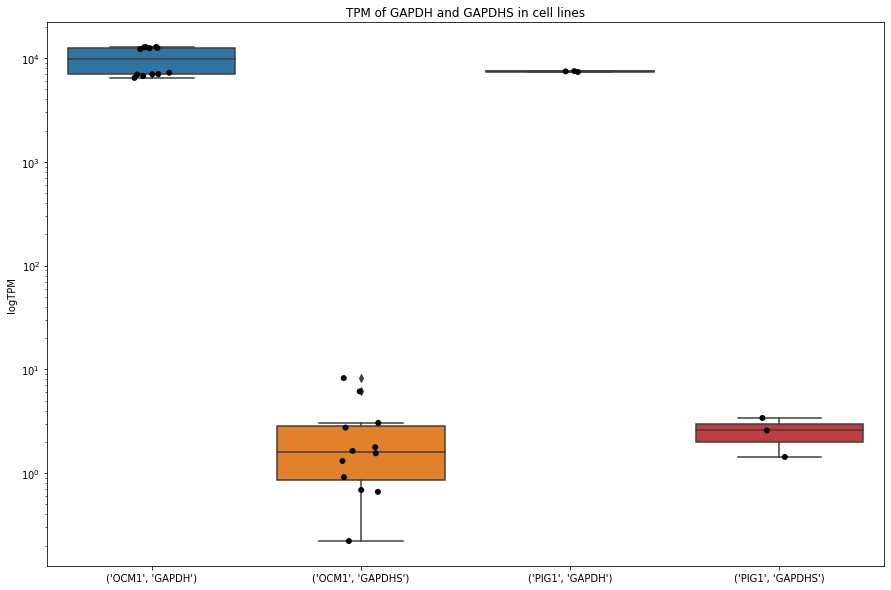

In [29]:
plt.figure(figsize=(15,10))
sns.boxplot(data=tpmsumge_cl)
sns.stripplot(data=tpmsumge_cl, size=6, color='black')
plt.title("TPM of GAPDH and GAPDHS in cell lines")
plt.yscale('log')
plt.ylabel("logTPM")
#plt.xlabel("Gene")
plt.show()

### Different OCM1

In [30]:
wt = ['SRR11658492_mRNA-seq_of_homo_sapiens_OCM1', 'SRR11658493_mRNA-seq_of_homo_sapiens_OCM1', 'SRR11658501_mRNA-seq_of_homo_sapiens_OCM1']
ocm1_wt = GDF_cl[GDF_cl['sample_SRR'].isin(wt)]

In [31]:
wt_otx = ['SRR11658498_mRNA-seq_of_homo_sapiens_OCM1', 'SRR11658499_mRNA-seq_of_homo_sapiens_OCM1', 'SRR11658500_mRNA-seq_of_homo_sapiens_OCM1']
ocm1_wt_otx = GDF_cl[GDF_cl['sample_SRR'].isin(wt_otx)]

In [32]:
bap1 = ['SRR11658495_mRNA-seq_of_homo_sapiens_OCM1', 'SRR11658496_mRNA-seq_of_homo_sapiens_OCM1', 'SRR11658497_mRNA-seq_of_homo_sapiens_OCM1']
ocm1_bap1 = GDF_cl[GDF_cl['sample_SRR'].isin(bap1)]

In [33]:
bap1_otx = ['SRR11658491_mRNA-seq_of_homo_sapiens_OCM1', 'SRR11658494_mRNA-seq_of_homo_sapiens_OCM1', 'SRR11658502_mRNA-seq_of_homo_sapiens_OCM']
ocm1_bap1_otx = GDF_cl[GDF_cl['sample_SRR'].isin(bap1_otx)]

In [34]:
ocm = pd.concat([ocm1_wt.assign(trtmnt='wt'), ocm1_wt_otx.assign(trtmnt='wt_otx'), ocm1_bap1.assign(trtmnt='bap1'), ocm1_bap1_otx.assign(trtmnt='bap1_otx')])
ocm

,sample_SRR,type_of_tissue,transcript_ID,chromosome,strand,start_pos,end_pos,number_of_exons,TPM,gene,trtmnt
18,SRR11658492_mRNA-seq_of_homo_sapiens_OCM1,OCM1,GAPDH3 (ENST00000396856),chr12,+,6534532,6538374,9,2.137281,GAPDH,wt
19,SRR11658492_mRNA-seq_of_homo_sapiens_OCM1,OCM1,GAPDH1 (ENST00000496049),chr12,+,6534512,6535141,2,10.147079,GAPDH,wt
20,SRR11658492_mRNA-seq_of_homo_sapiens_OCM1,OCM1,GAPDH2 (ENST00000229239),chr12,+,6534517,6538374,9,5138.864258,GAPDH,wt
21,SRR11658492_mRNA-seq_of_homo_sapiens_OCM1,OCM1,GAPDH4 (ENST00000492719),chr12,+,6534533,6537996,8,0.000000,GAPDH,wt
22,SRR11658492_mRNA-seq_of_homo_sapiens_OCM1,OCM1,GAPDH5 (ENST00000396861),chr12,+,6534534,6538374,9,478.110565,GAPDH,wt
...,...,...,...,...,...,...,...,...,...,...,...
71,SRR11658494_mRNA-seq_of_homo_sapiens_OCM1,OCM1,TR3 (MSTRG.20575.3),chr19,+,35536592,35547526,16,0.661662,GAPDHS,bap1_otx
212,SRR11658502_mRNA-seq_of_homo_sapiens_OCM,OCM1,GAPDHS1 (ENST00000586334),chr19,-,35533455,35543026,6,0.000000,GAPDHS,bap1_otx
213,SRR11658502_mRNA-seq_of_homo_sapiens_OCM,OCM1,GAPDHS2 (ENST00000222286),chr19,-,35533456,35545599,11,0.136737,GAPDHS,bap1_otx
214,SRR11658502_mRNA-seq_of_homo_sapiens_OCM,OCM1,GAPDHS3 (ENST00000585510),chr19,+,35536783,35543026,6,0.000000,GAPDHS,bap1_otx


In [35]:
tpmsumge_cl_t = pd.crosstab(index=ocm[ocm['gene']=='GAPDH'].sample_SRR, columns=[ocm[ocm['gene']=='GAPDH'].trtmnt], values = ocm[ocm['gene']=='GAPDH'].TPM, aggfunc='sum')
def color_negative_red(val):
    color = 'red' if val == 0 else ''
    return 'background-color: %s' % color 

tpmsumge_cl_t.style.applymap(color_negative_red)

trtmnt,bap1,bap1_otx,wt,wt_otx
sample_SRR,,,,
SRR11658491_mRNA-seq_of_homo_sapiens_OCM1,nan,12670.375850,nan,nan
SRR11658492_mRNA-seq_of_homo_sapiens_OCM1,nan,nan,6984.107304,nan
SRR11658493_mRNA-seq_of_homo_sapiens_OCM1,nan,nan,7203.341411,nan
SRR11658494_mRNA-seq_of_homo_sapiens_OCM1,nan,12696.843990,nan,nan
SRR11658495_mRNA-seq_of_homo_sapiens_OCM1,6424.002045,nan,nan,nan
SRR11658496_mRNA-seq_of_homo_sapiens_OCM1,6689.923850,nan,nan,nan
SRR11658497_mRNA-seq_of_homo_sapiens_OCM1,6964.260363,nan,nan,nan
SRR11658498_mRNA-seq_of_homo_sapiens_OCM1,nan,nan,nan,12164.503384
SRR11658499_mRNA-seq_of_homo_sapiens_OCM1,nan,nan,nan,12487.597566


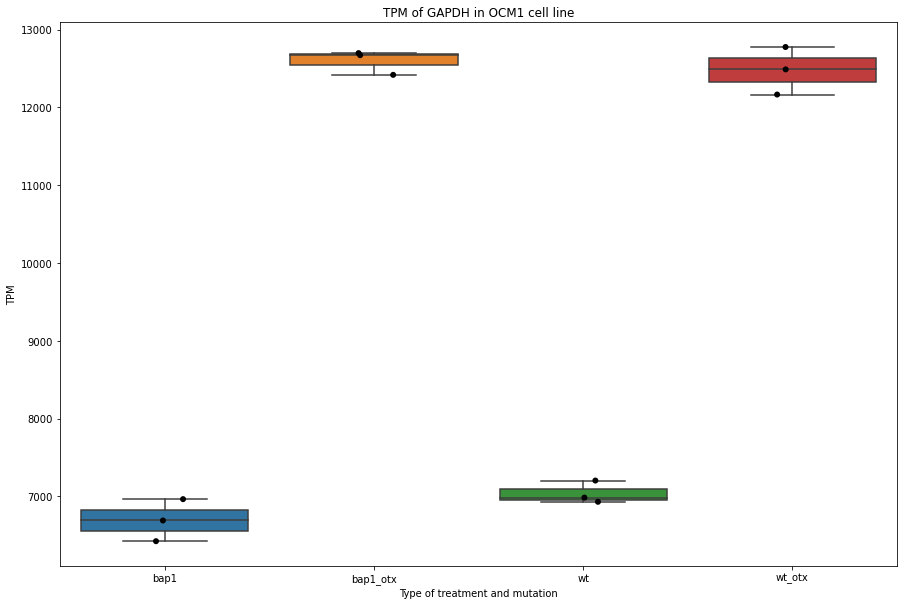

In [36]:
plt.figure(figsize=(15,10))
sns.boxplot(data=tpmsumge_cl_t)
sns.stripplot(data=tpmsumge_cl_t, size=6, color='black')
plt.title("TPM of GAPDH in OCM1 cell line")
plt.ylabel("TPM")
plt.xlabel("Type of treatment and mutation")
plt.show()

In [37]:
tpmsumge_cl_ts = pd.crosstab(index=ocm[ocm['gene']=='GAPDHS'].sample_SRR, columns=[ocm[ocm['gene']=='GAPDHS'].trtmnt], values = ocm[ocm['gene']=='GAPDHS'].TPM, aggfunc='sum')
def color_negative_red(val):
    color = 'red' if val == 0 else ''
    return 'background-color: %s' % color 

tpmsumge_cl_ts.style.applymap(color_negative_red)

trtmnt,bap1,bap1_otx,wt,wt_otx
sample_SRR,,,,
SRR11658491_mRNA-seq_of_homo_sapiens_OCM1,nan,0.914979,nan,nan
SRR11658492_mRNA-seq_of_homo_sapiens_OCM1,nan,nan,6.136503,nan
SRR11658493_mRNA-seq_of_homo_sapiens_OCM1,nan,nan,8.239639,nan
SRR11658494_mRNA-seq_of_homo_sapiens_OCM1,nan,0.661662,nan,nan
SRR11658495_mRNA-seq_of_homo_sapiens_OCM1,1.777981,nan,nan,nan
SRR11658496_mRNA-seq_of_homo_sapiens_OCM1,1.637295,nan,nan,nan
SRR11658497_mRNA-seq_of_homo_sapiens_OCM1,2.746987,nan,nan,nan
SRR11658498_mRNA-seq_of_homo_sapiens_OCM1,nan,nan,nan,1.309284
SRR11658499_mRNA-seq_of_homo_sapiens_OCM1,nan,nan,nan,0.688403


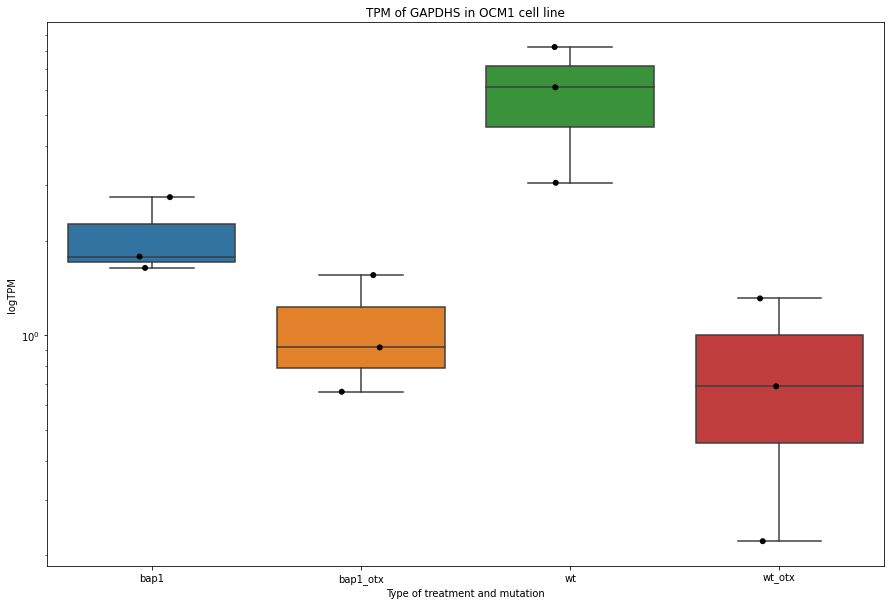

In [38]:
plt.figure(figsize=(15,10))
sns.boxplot(data=tpmsumge_cl_ts)
sns.stripplot(data=tpmsumge_cl_ts, size=6, color='black')
plt.title("TPM of GAPDHS in OCM1 cell line")
plt.yscale('log')
plt.ylabel("logTPM")
plt.xlabel("Type of treatment and mutation")
plt.show()

### OCM1 wt VS PIG1 wt

In [39]:
ocm_wt_pig = pd.concat([ocm1_wt, GDF_cl[GDF_cl['type_of_tissue']=='PIG1']]).replace('OCM1','OCM1 wt')
ocm_wt_pig

,sample_SRR,type_of_tissue,transcript_ID,chromosome,strand,start_pos,end_pos,number_of_exons,TPM,gene
18,SRR11658492_mRNA-seq_of_homo_sapiens_OCM1,OCM1 wt,GAPDH3 (ENST00000396856),chr12,+,6534532,6538374,9,2.137281,GAPDH
19,SRR11658492_mRNA-seq_of_homo_sapiens_OCM1,OCM1 wt,GAPDH1 (ENST00000496049),chr12,+,6534512,6535141,2,10.147079,GAPDH
20,SRR11658492_mRNA-seq_of_homo_sapiens_OCM1,OCM1 wt,GAPDH2 (ENST00000229239),chr12,+,6534517,6538374,9,5138.864258,GAPDH
21,SRR11658492_mRNA-seq_of_homo_sapiens_OCM1,OCM1 wt,GAPDH4 (ENST00000492719),chr12,+,6534533,6537996,8,0.000000,GAPDH
22,SRR11658492_mRNA-seq_of_homo_sapiens_OCM1,OCM1 wt,GAPDH5 (ENST00000396861),chr12,+,6534534,6538374,9,478.110565,GAPDH
...,...,...,...,...,...,...,...,...,...,...
251,SRR14683914_RNA-Seq_of_human_melanocytes_cell_...,PIG1,TR3 (MSTRG.20575.3),chr19,+,35536592,35547526,16,2.736429,GAPDHS
266,SRR14683915_RNA-Seq_of_human_melanocytes_cell_...,PIG1,GAPDHS1 (ENST00000586334),chr19,-,35533455,35543026,6,0.000000,GAPDHS
267,SRR14683915_RNA-Seq_of_human_melanocytes_cell_...,PIG1,GAPDHS2 (ENST00000222286),chr19,-,35533456,35545599,11,0.000000,GAPDHS
268,SRR14683915_RNA-Seq_of_human_melanocytes_cell_...,PIG1,GAPDHS3 (ENST00000585510),chr19,+,35536783,35543026,6,0.000000,GAPDHS


In [40]:
tpmsumge_owp = pd.crosstab(index=ocm_wt_pig[ocm_wt_pig['gene']=='GAPDH'].sample_SRR, columns=[ocm_wt_pig[ocm_wt_pig['gene']=='GAPDH'].type_of_tissue], values = ocm_wt_pig[ocm_wt_pig['gene']=='GAPDH'].TPM,aggfunc='sum')
def color_negative_red(val):
    color = 'red' if val == 0 else ''
    return 'background-color: %s' % color 

tpmsumge_owp.style.applymap(color_negative_red)

type_of_tissue,OCM1 wt,PIG1
sample_SRR,,
SRR11658492_mRNA-seq_of_homo_sapiens_OCM1,6984.107304,nan
SRR11658493_mRNA-seq_of_homo_sapiens_OCM1,7203.341411,nan
SRR11658501_mRNA-seq_of_homo_sapiens_OCM1,6930.283254,nan
SRR14683911_RNA-Seq_of_human_melanocytes_cell_line,nan,7329.984610
SRR14683914_RNA-Seq_of_human_melanocytes_cell_line,nan,7423.787007
SRR14683915_RNA-Seq_of_human_melanocytes_cell_line,nan,7465.087649


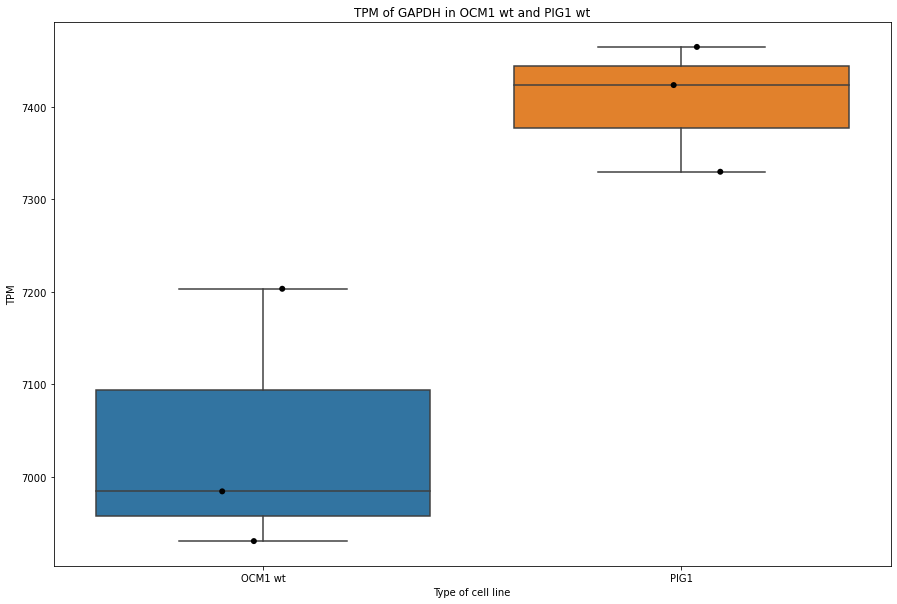

In [41]:
plt.figure(figsize=(15,10))
sns.boxplot(data=tpmsumge_owp)
sns.stripplot(data=tpmsumge_owp, size=6, color='black')
plt.title("TPM of GAPDH in OCM1 wt and PIG1 wt")
#plt.yscale('log')
plt.ylabel("TPM")
plt.xlabel("Type of cell line")
plt.show()

In [42]:
tpmsumge_owps = pd.crosstab(index=ocm_wt_pig[ocm_wt_pig['gene']=='GAPDHS'].sample_SRR, columns=[ocm_wt_pig[ocm_wt_pig['gene']=='GAPDHS'].type_of_tissue], values = ocm_wt_pig[ocm_wt_pig['gene']=='GAPDHS'].TPM,aggfunc='sum')
def color_negative_red(val):
    color = 'red' if val == 0 else ''
    return 'background-color: %s' % color 

tpmsumge_owps.style.applymap(color_negative_red)

type_of_tissue,OCM1 wt,PIG1
sample_SRR,,
SRR11658492_mRNA-seq_of_homo_sapiens_OCM1,6.136503,nan
SRR11658493_mRNA-seq_of_homo_sapiens_OCM1,8.239639,nan
SRR11658501_mRNA-seq_of_homo_sapiens_OCM1,3.051662,nan
SRR14683911_RNA-Seq_of_human_melanocytes_cell_line,nan,1.433940
SRR14683914_RNA-Seq_of_human_melanocytes_cell_line,nan,3.403397
SRR14683915_RNA-Seq_of_human_melanocytes_cell_line,nan,2.581086


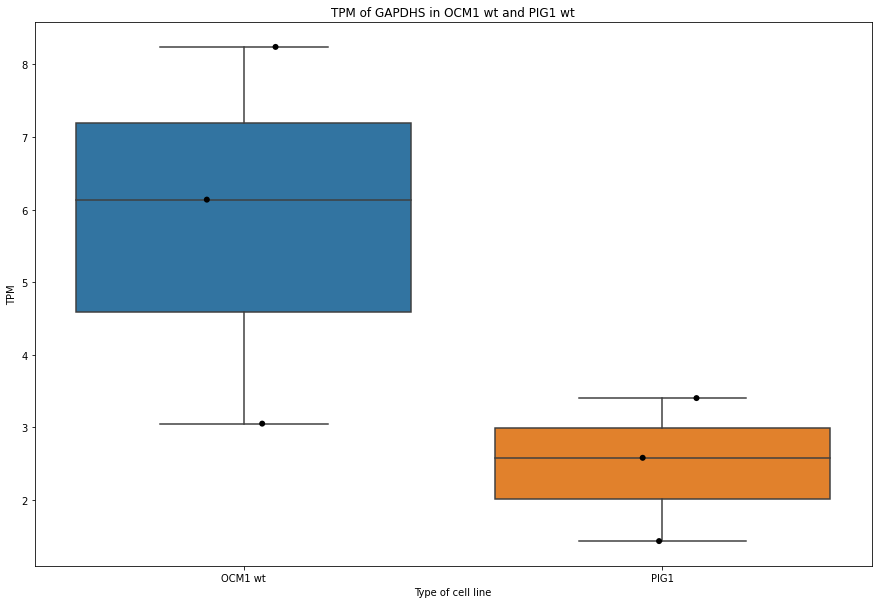

In [43]:
plt.figure(figsize=(15,10))
sns.boxplot(data=tpmsumge_owps)
sns.stripplot(data=tpmsumge_owps, size=6, color='black')
plt.title("TPM of GAPDHS in OCM1 wt and PIG1 wt")
#plt.yscale('log')
plt.ylabel("TPM")
plt.xlabel("Type of cell line")
plt.show()

# GAPDHS/GAPDH

### Невусы

In [45]:
tpmsum_nev_norm = tpmsum_nev
tpmsum_nev_norm['norm'] = tpmsum_nev_norm['GAPDHS']/tpmsum_nev_norm['GAPDH']
tpmsum_nev_norm

gene,GAPDH,GAPDHS,norm
sample_SRR,,,
SRR6916886_GSM3071633_LE.063.SP.064_N,2675.266404,65.273373,0.024399
SRR6916887_GSM3071634_LE.117.RB.118_N,3797.041000,73.708010,0.019412
SRR6916888_GSM3071635_FKH.021.022_N,2435.848744,119.241722,0.048953
SRR6916889_GSM3071636_LE.081.TR.082_N,1279.490800,65.346228,0.051072
SRR6916890_GSM3071637_BO.001.SH.002_N,3120.161123,68.042659,0.021807
SRR6916893_GSM3071640_LE.037.RG.038_N,1790.432847,75.158884,0.041978
SRR6916895_GSM3071642_LE.029.SE.030_N,2710.293226,68.762680,0.025371
SRR6916897_GSM3071644_LE.021.TH.022_N,1439.054784,346.790153,0.240985
SRR6916898_GSM3071645_FKH.027.028_N,4164.470907,94.284940,0.022640


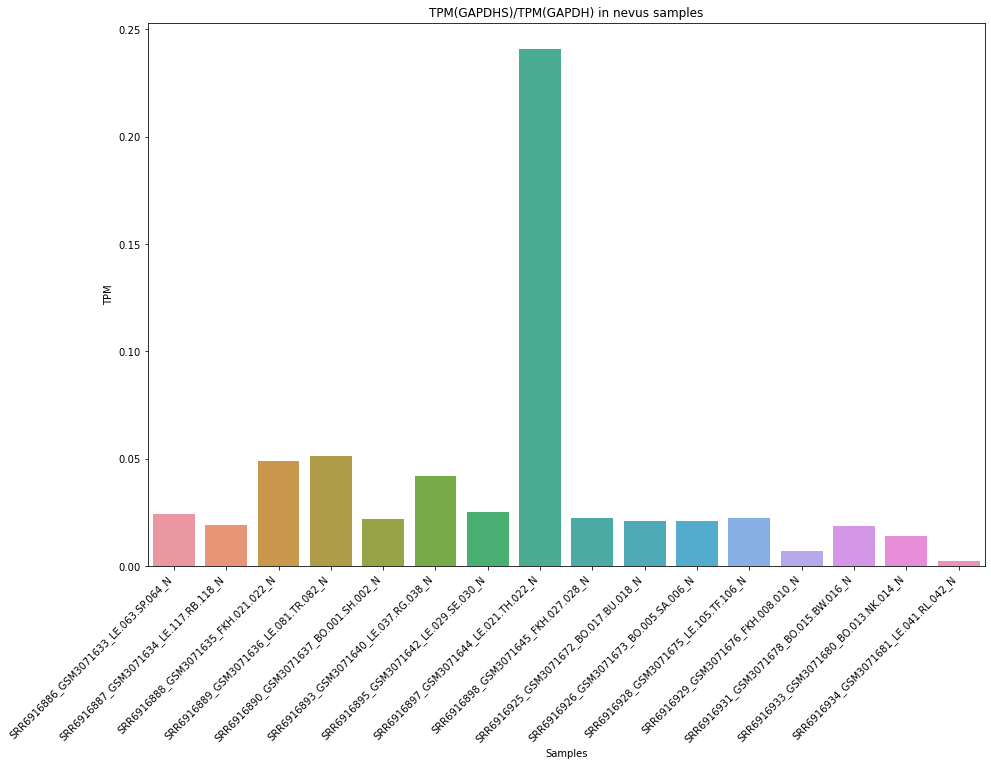

In [63]:
plt.figure(figsize=(15,10))
sns.barplot(data=tpmsum_nev_norm, y=tpmsum_nev_norm['norm'], x = tpmsum_nev_norm.index)
#sns.stripplot(data=tpmsum, size=6, color='black')
plt.title("TPM(GAPDHS)/TPM(GAPDH) in nevus samples")
#plt.yscale('log')
plt.ylabel("TPM")
plt.xlabel("Samples")
plt.xticks(rotation=45, ha='right')
plt.show()

### Меланомы

In [46]:
tpmsum_mel_norm = tpmsum_mel
tpmsum_mel_norm['norm'] = tpmsum_mel_norm['GAPDHS']/tpmsum_mel_norm['GAPDH']
tpmsum_mel_norm

gene,GAPDH,GAPDHS,norm
sample_SRR,,,
SRR6916900_GSM3071647_LE.129.NG_M,2440.572740,43.925262,0.017998
SRR6916902_GSM3071649_LE.117.RB_M,4132.682959,1.227376,0.000297
SRR6916903_GSM3071650_LE.037.RG_M,1377.530186,124.879280,0.090654
SRR6916904_GSM3071651_KO.679_M,2362.809799,131.381660,0.055604
SRR6916907_GSM3071654_LE.039.BE_M,1637.050615,64.365154,0.039318
SRR6916914_GSM3071661_KO.1031_M,4417.441545,68.514553,0.015510
SRR6916917_GSM3071664_LE.025.BI_M_,3386.452764,31.776315,0.009383
SRR6916918_GSM3071665_KO.971_M,1990.744108,9.558961,0.004802
SRR6916920_GSM3071667_MA.001.SH_M,4112.162908,1.227376,0.000298


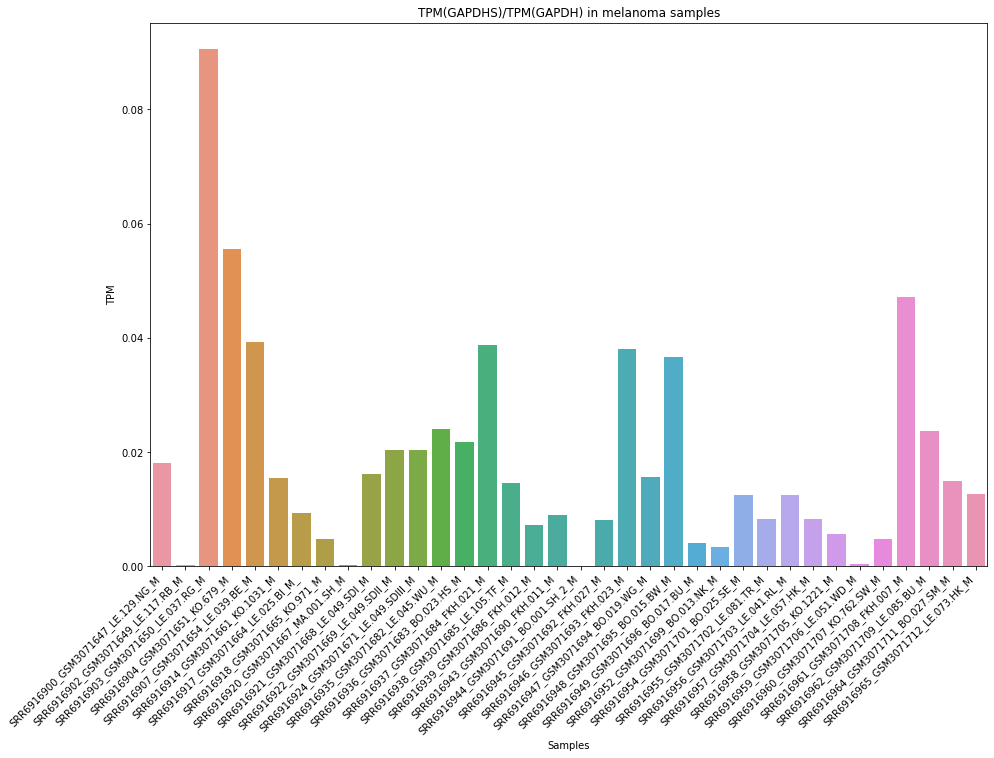

In [64]:
plt.figure(figsize=(15,10))
sns.barplot(data=tpmsum_mel_norm, y=tpmsum_mel_norm['norm'], x = tpmsum_mel_norm.index)
#sns.stripplot(data=tpmsum, size=6, color='black')
plt.title("TPM(GAPDHS)/TPM(GAPDH) in melanoma samples")
#plt.yscale('log')
plt.ylabel("TPM")
plt.xlabel("Samples")
plt.xticks(rotation=45, ha='right')
plt.show()

### OCM1

In [49]:
tpmsumge_ocm = pd.crosstab(index=ocm.sample_SRR, columns=[ocm.gene], values = ocm.TPM, aggfunc='sum')
tpmsumge_ocm_norm=tpmsumge_ocm
tpmsumge_ocm_norm['norm'] = tpmsumge_ocm_norm['GAPDHS']/tpmsumge_ocm_norm['GAPDH']
tpmsumge_ocm_norm

gene,GAPDH,GAPDHS,norm
sample_SRR,,,
SRR11658491_mRNA-seq_of_homo_sapiens_OCM1,12670.375850,0.914979,0.000072
SRR11658492_mRNA-seq_of_homo_sapiens_OCM1,6984.107304,6.136503,0.000879
SRR11658493_mRNA-seq_of_homo_sapiens_OCM1,7203.341411,8.239639,0.001144
SRR11658494_mRNA-seq_of_homo_sapiens_OCM1,12696.843990,0.661662,0.000052
SRR11658495_mRNA-seq_of_homo_sapiens_OCM1,6424.002045,1.777981,0.000277
SRR11658496_mRNA-seq_of_homo_sapiens_OCM1,6689.923850,1.637295,0.000245
SRR11658497_mRNA-seq_of_homo_sapiens_OCM1,6964.260363,2.746987,0.000394
SRR11658498_mRNA-seq_of_homo_sapiens_OCM1,12164.503384,1.309284,0.000108
SRR11658499_mRNA-seq_of_homo_sapiens_OCM1,12487.597566,0.688403,0.000055


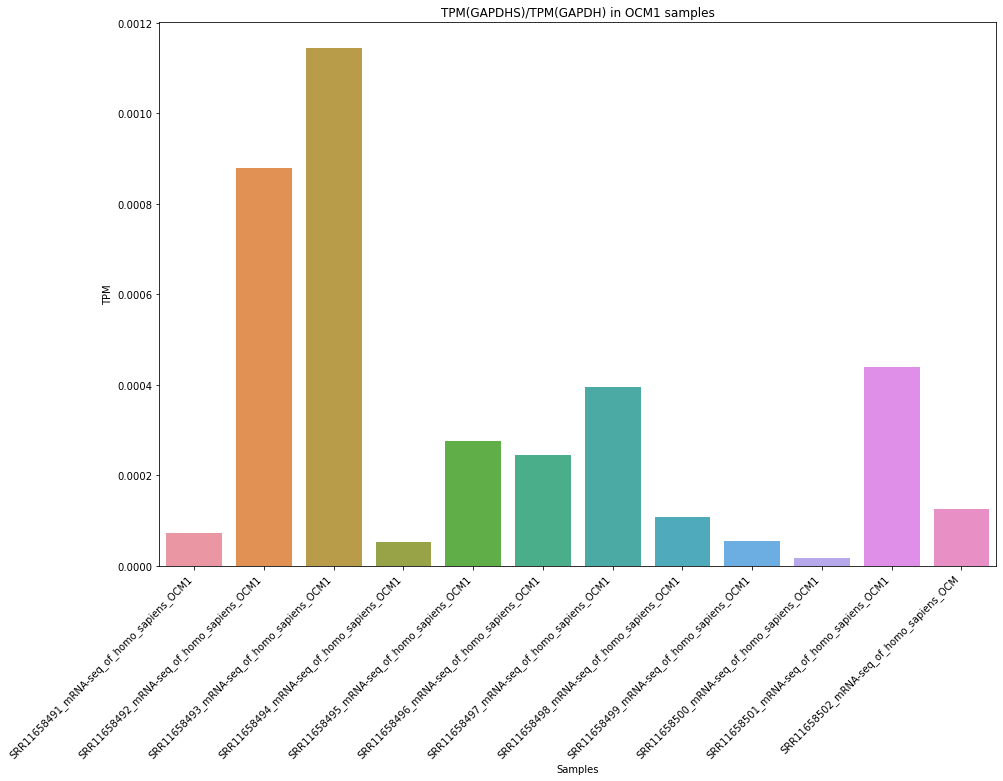

In [50]:
plt.figure(figsize=(15,10))
sns.barplot(data=tpmsumge_ocm_norm, y=tpmsumge_ocm_norm['norm'], x = tpmsumge_ocm_norm.index)
#sns.stripplot(data=tpmsum, size=6, color='black')
plt.title("TPM(GAPDHS)/TPM(GAPDH) in OCM1 samples")
#plt.yscale('log')
plt.ylabel("TPM")
plt.xlabel("Samples")
plt.xticks(rotation=45, ha='right')
plt.show()

### PIG1

In [51]:
pig = GDF_cl[GDF_cl['type_of_tissue']=='PIG1']

In [52]:
tpmsumge_pig = pd.crosstab(index=pig.sample_SRR, columns=[pig.gene], values = pig.TPM, aggfunc='sum')
def color_negative_red(val):
    color = 'red' if val == 0 else ''
    return 'background-color: %s' % color 

tpmsumge_pig.style.applymap(color_negative_red)

gene,GAPDH,GAPDHS
sample_SRR,,
SRR14683911_RNA-Seq_of_human_melanocytes_cell_line,7329.984610,1.433940
SRR14683914_RNA-Seq_of_human_melanocytes_cell_line,7423.787007,3.403397
SRR14683915_RNA-Seq_of_human_melanocytes_cell_line,7465.087649,2.581086


In [53]:
tpmsumge_pig_norm = tpmsumge_pig
tpmsumge_pig_norm['norm'] = tpmsumge_pig_norm['GAPDHS']/tpmsumge_pig_norm['GAPDH']
tpmsumge_pig_norm

gene,GAPDH,GAPDHS,norm
sample_SRR,,,
SRR14683911_RNA-Seq_of_human_melanocytes_cell_line,7329.984610,1.433940,0.000196
SRR14683914_RNA-Seq_of_human_melanocytes_cell_line,7423.787007,3.403397,0.000458
SRR14683915_RNA-Seq_of_human_melanocytes_cell_line,7465.087649,2.581086,0.000346


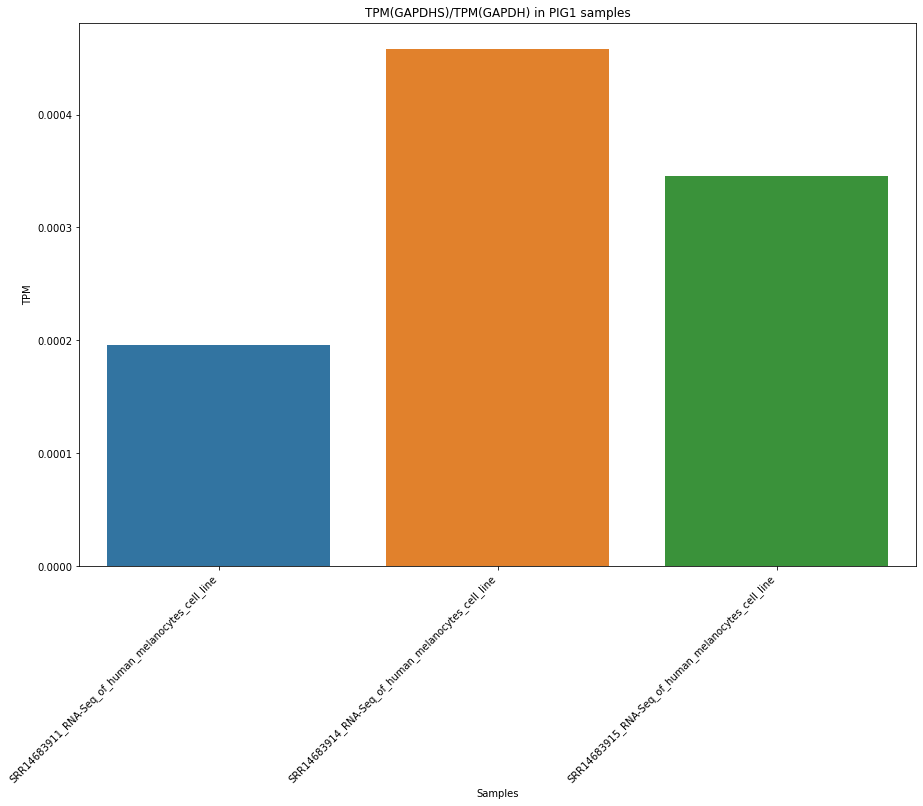

In [77]:
plt.figure(figsize=(15,10))
sns.barplot(data=tpmsumge_pig_norm, y=tpmsumge_pig_norm['norm'], x = tpmsumge_pig_norm.index)
#sns.stripplot(data=tpmsum, size=6, color='black')
plt.title("TPM(GAPDHS)/TPM(GAPDH) in PIG1 samples")
#plt.yscale('log')
plt.ylabel("TPM")
plt.xlabel("Samples")
plt.xticks(rotation=45, ha='right')
plt.show()

### M1

In [54]:
GDF_M1 = GDF[GDF['type_of_tissue']=='M1']
tpmsum_m1 = pd.crosstab(GDF_M1.sample_SRR, GDF_M1.gene, values = GDF_M1.TPM, aggfunc='sum')
tpmsum_m1_norm = tpmsum_m1
tpmsum_m1_norm['norm'] = tpmsum_m1_norm['GAPDHS']/tpmsum_m1_norm['GAPDH']
tpmsum_m1_norm

gene,GAPDH,GAPDHS,norm
sample_SRR,,,
SRR6916900_GSM3071647_LE.129.NG_M,2440.572740,43.925262,0.017998
SRR6916902_GSM3071649_LE.117.RB_M,4132.682959,1.227376,0.000297
SRR6916903_GSM3071650_LE.037.RG_M,1377.530186,124.879280,0.090654
SRR6916904_GSM3071651_KO.679_M,2362.809799,131.381660,0.055604
SRR6916907_GSM3071654_LE.039.BE_M,1637.050615,64.365154,0.039318
SRR6916914_GSM3071661_KO.1031_M,4417.441545,68.514553,0.015510
SRR6916917_GSM3071664_LE.025.BI_M_,3386.452764,31.776315,0.009383
SRR6916918_GSM3071665_KO.971_M,1990.744108,9.558961,0.004802
SRR6916920_GSM3071667_MA.001.SH_M,4112.162908,1.227376,0.000298


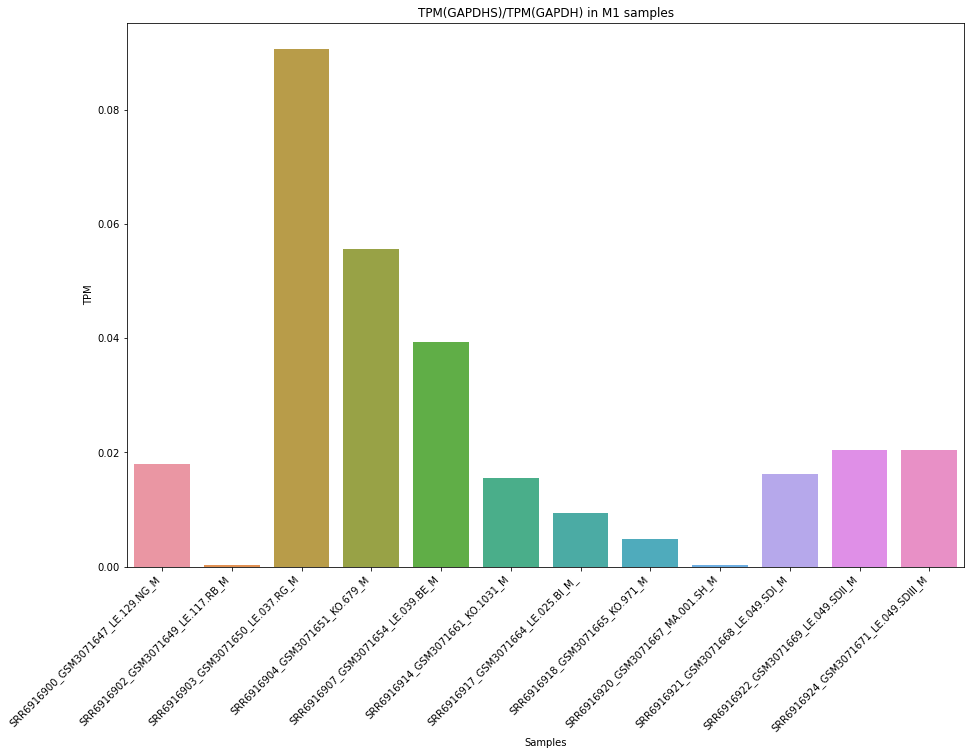

In [55]:
plt.figure(figsize=(15,10))
sns.barplot(data=tpmsum_m1_norm, y=tpmsum_m1_norm['norm'], x = tpmsum_m1_norm.index)
#sns.stripplot(data=tpmsum, size=6, color='black')
plt.title("TPM(GAPDHS)/TPM(GAPDH) in M1 samples")
#plt.yscale('log')
plt.ylabel("TPM")
plt.xlabel("Samples")
plt.xticks(rotation=45, ha='right')
plt.show()

### M2

In [84]:
GDF_M2 = GDF[GDF['type_of_tissue']=='M2']
tpmsum_m2 = pd.crosstab(GDF_M2.sample_SRR, GDF_M2.gene, values = GDF_M2.TPM, aggfunc='sum')
tpmsum_m2_norm = tpmsum_m2
tpmsum_m2_norm['norm'] = tpmsum_m2_norm['GAPDHS']/tpmsum_m2_norm['GAPDH']

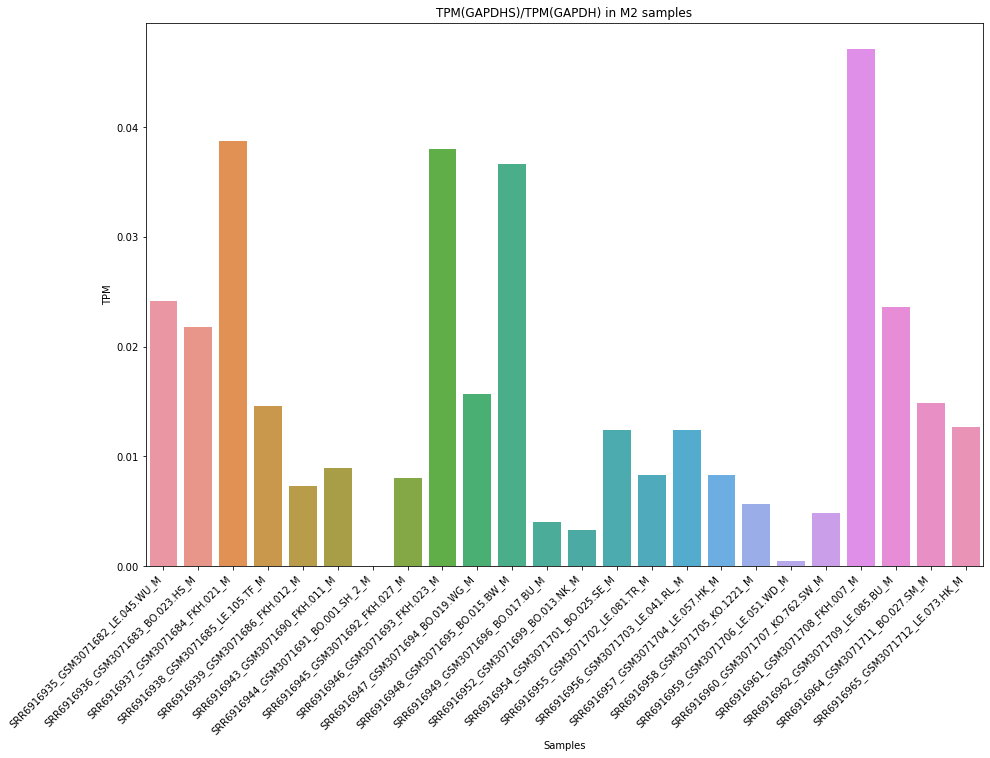

In [85]:
plt.figure(figsize=(15,10))
sns.barplot(data=tpmsum_m2_norm, y=tpmsum_m2_norm['norm'], x = tpmsum_m2_norm.index)
#sns.stripplot(data=tpmsum, size=6, color='black')
plt.title("TPM(GAPDHS)/TPM(GAPDH) in M2 samples")
#plt.yscale('log')
plt.ylabel("TPM")
plt.xlabel("Samples")
plt.xticks(rotation=45, ha='right')
plt.show()

# GAPDHS/GAPDH, counting GAPDH2 and GAPDHS2

In [7]:
gapdh2
gapdhs2 = transcripts[transcripts.transcript_ID == 'GAPDHS2 (ENST00000222286)']

NameError: name 'transcripts' is not defined

In [8]:
G2 = pd.concat([gapdh2.assign(gene='GAPDH2'), gapdhs2.assign(gene='GAPDHS2')])
G2

NameError: name 'gapdh2' is not defined

### Невусы

In [17]:
tpmsum_nev_G2 = pd.crosstab(G2[G2['type_of_tissue'].isin(['N1', 'N2'])].sample_SRR, G2[G2['type_of_tissue'].isin(['N1', 'N2'])].gene, values = G2[G2['type_of_tissue'].isin(['N1', 'N2'])].TPM, aggfunc='sum')
tpmsum_nev_G2['norm'] = tpmsum_nev_G2['GAPDHS2']/tpmsum_nev_G2['GAPDH2']
tpmsum_nev_G2

gene,GAPDH2,GAPDHS2,norm
sample_SRR,,,
SRR6916886_GSM3071633_LE.063.SP.064_N,1803.445679,0.0,0.0
SRR6916887_GSM3071634_LE.117.RB.118_N,2448.952148,0.0,0.0
SRR6916888_GSM3071635_FKH.021.022_N,1697.278076,0.0,0.0
SRR6916889_GSM3071636_LE.081.TR.082_N,486.045532,0.0,0.0
SRR6916890_GSM3071637_BO.001.SH.002_N,2099.939941,0.0,0.0
SRR6916893_GSM3071640_LE.037.RG.038_N,1292.837158,0.0,0.0
SRR6916895_GSM3071642_LE.029.SE.030_N,1926.492065,0.0,0.0
SRR6916897_GSM3071644_LE.021.TH.022_N,1018.509644,0.0,0.0
SRR6916898_GSM3071645_FKH.027.028_N,2839.795898,0.0,0.0


### Меланомы

In [20]:
tpmsum_mel_G2 = pd.crosstab(G2[G2['type_of_tissue'].isin(['M1', 'M2'])].sample_SRR, G2[G2['type_of_tissue'].isin(['M1', 'M2'])].gene, values = G2[G2['type_of_tissue'].isin(['M1', 'M2'])].TPM, aggfunc='sum')
tpmsum_mel_G2['norm'] = tpmsum_mel_G2['GAPDHS2']/tpmsum_mel_G2['GAPDH2']
tpmsum_mel_G2

gene,GAPDH2,GAPDHS2,norm
sample_SRR,,,
SRR6916900_GSM3071647_LE.129.NG_M,1692.946045,0.000000,0.000000
SRR6916902_GSM3071649_LE.117.RB_M,2482.122314,0.000000,0.000000
SRR6916903_GSM3071650_LE.037.RG_M,837.237549,0.000000,0.000000
SRR6916904_GSM3071651_KO.679_M,1520.092896,0.000000,0.000000
SRR6916907_GSM3071654_LE.039.BE_M,920.101929,0.000000,0.000000
SRR6916914_GSM3071661_KO.1031_M,2547.716797,0.000000,0.000000
SRR6916917_GSM3071664_LE.025.BI_M_,2388.755615,0.000000,0.000000
SRR6916918_GSM3071665_KO.971_M,1403.061646,0.000000,0.000000
SRR6916920_GSM3071667_MA.001.SH_M,2482.122314,0.000000,0.000000


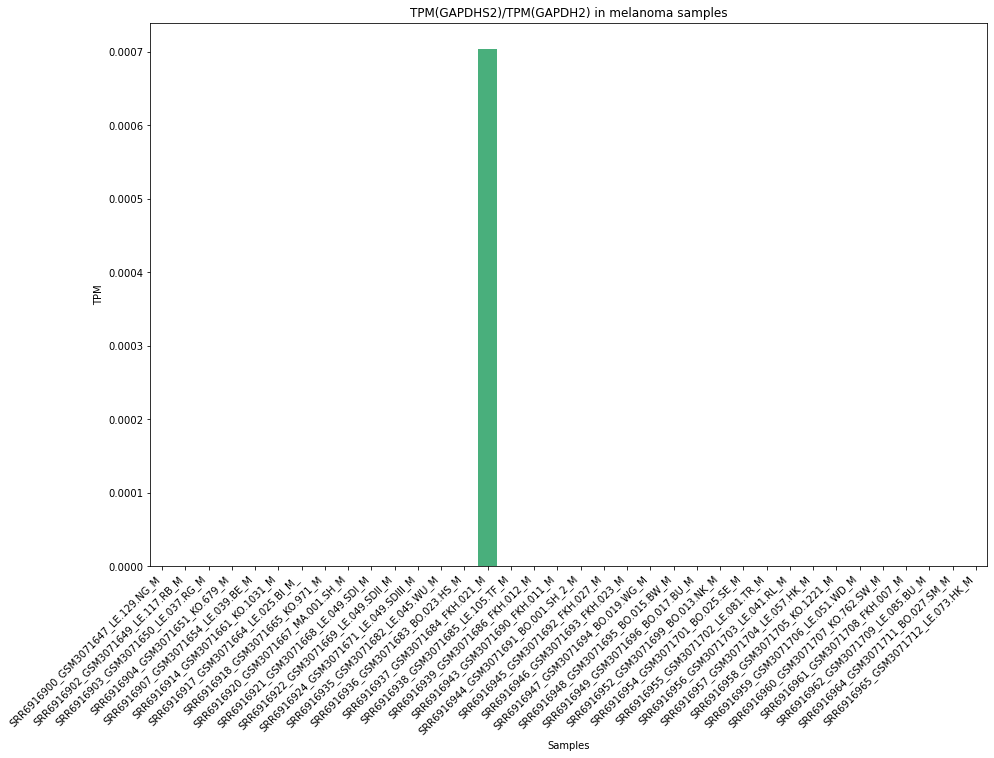

In [21]:
plt.figure(figsize=(15,10))
sns.barplot(data=tpmsum_mel_G2, y=tpmsum_mel_G2['norm'], x = tpmsum_mel_G2.index)
#sns.stripplot(data=tpmsum, size=6, color='black')
plt.title("TPM(GAPDHS2)/TPM(GAPDH2) in melanoma samples")
#plt.yscale('log')
plt.ylabel("TPM")
plt.xlabel("Samples")
plt.xticks(rotation=45, ha='right')
plt.show()

### OCM1

In [9]:
gapdh2_cl = transcripts_cl[transcripts_cl.transcript_ID == "GAPDH2 (ENST00000229239)"]
gapdhs2_cl = transcripts_cl[transcripts_cl.transcript_ID.isin(['GAPDHS2 (ENST00000222286)', 'GAPDHS3 (ENST00000585510)'])]

In [13]:
G2_cl = pd.concat([gapdh2_cl.assign(gene='GAPDH'), gapdhs2_cl.assign(gene='GAPDHS')])
G2_cl

,sample_SRR,type_of_tissue,transcript_ID,chromosome,strand,start_pos,end_pos,number_of_exons,TPM,gene
1,SRR11658491_mRNA-seq_of_homo_sapiens_OCM1,OCM1,GAPDH2 (ENST00000229239),chr12,+,6534517,6538374,9,9858.530273,GAPDH
20,SRR11658492_mRNA-seq_of_homo_sapiens_OCM1,OCM1,GAPDH2 (ENST00000229239),chr12,+,6534517,6538374,9,5138.864258,GAPDH
37,SRR11658493_mRNA-seq_of_homo_sapiens_OCM1,OCM1,GAPDH2 (ENST00000229239),chr12,+,6534517,6538374,9,5375.867188,GAPDH
56,SRR11658494_mRNA-seq_of_homo_sapiens_OCM1,OCM1,GAPDH2 (ENST00000229239),chr12,+,6534517,6538374,9,9632.772461,GAPDH
74,SRR11658495_mRNA-seq_of_homo_sapiens_OCM1,OCM1,GAPDH2 (ENST00000229239),chr12,+,6534517,6538374,9,4767.971191,GAPDH
92,SRR11658496_mRNA-seq_of_homo_sapiens_OCM1,OCM1,GAPDH2 (ENST00000229239),chr12,+,6534517,6538374,9,5065.834473,GAPDH
109,SRR11658497_mRNA-seq_of_homo_sapiens_OCM1,OCM1,GAPDH2 (ENST00000229239),chr12,+,6534517,6538374,9,5227.596191,GAPDH
128,SRR11658498_mRNA-seq_of_homo_sapiens_OCM1,OCM1,GAPDH2 (ENST00000229239),chr12,+,6534517,6538374,9,9444.947266,GAPDH
146,SRR11658499_mRNA-seq_of_homo_sapiens_OCM1,OCM1,GAPDH2 (ENST00000229239),chr12,+,6534517,6538374,9,9359.350586,GAPDH
164,SRR11658500_mRNA-seq_of_homo_sapiens_OCM1,OCM1,GAPDH2 (ENST00000229239),chr12,+,6534517,6538374,9,9487.918945,GAPDH


['SRR11658491_mRNA-seq_of_homo_sapiens_OCM1',
 'SRR11658492_mRNA-seq_of_homo_sapiens_OCM1',
 'SRR11658493_mRNA-seq_of_homo_sapiens_OCM1',
 'SRR11658494_mRNA-seq_of_homo_sapiens_OCM1',
 'SRR11658495_mRNA-seq_of_homo_sapiens_OCM1',
 'SRR11658496_mRNA-seq_of_homo_sapiens_OCM1',
 'SRR11658497_mRNA-seq_of_homo_sapiens_OCM1',
 'SRR11658498_mRNA-seq_of_homo_sapiens_OCM1',
 'SRR11658499_mRNA-seq_of_homo_sapiens_OCM1',
 'SRR11658500_mRNA-seq_of_homo_sapiens_OCM1',
 'SRR11658501_mRNA-seq_of_homo_sapiens_OCM1',
 'SRR11658502_mRNA-seq_of_homo_sapiens_OCM',
 'SRR14683911_RNA-Seq_of_human_melanocytes_cell_line',
 'SRR14683914_RNA-Seq_of_human_melanocytes_cell_line',
 'SRR14683915_RNA-Seq_of_human_melanocytes_cell_line']

In [32]:
tpmsum_ocm_G2 = pd.crosstab(G2_cl.sample_SRR, G2_cl.gene, values = G2_cl.TPM, aggfunc='sum')
tpmsum_ocm_G2['norm'] = tpmsum_ocm_G2['GAPDHS']/tpmsum_ocm_G2['GAPDH']
tpmsum_ocm_G2 = pd.concat([tpmsum_ocm_G2, gapdh2_cl.set_index('sample_SRR')['type_of_tissue'].rename("type")], axis=1)
tpmsum_ocm_G2

,GAPDH,GAPDHS,norm,type
sample_SRR,,,,
SRR11658491_mRNA-seq_of_homo_sapiens_OCM1,9858.530273,0.003975,4.032041e-07,OCM1
SRR11658492_mRNA-seq_of_homo_sapiens_OCM1,5138.864258,0.086443,1.682142e-05,OCM1
SRR11658493_mRNA-seq_of_homo_sapiens_OCM1,5375.867188,0.027322,5.082343e-06,OCM1
SRR11658494_mRNA-seq_of_homo_sapiens_OCM1,9632.772461,0.000000,0.000000e+00,OCM1
SRR11658495_mRNA-seq_of_homo_sapiens_OCM1,4767.971191,0.000000,0.000000e+00,OCM1
SRR11658496_mRNA-seq_of_homo_sapiens_OCM1,5065.834473,0.000000,0.000000e+00,OCM1
SRR11658497_mRNA-seq_of_homo_sapiens_OCM1,5227.596191,0.116327,2.225248e-05,OCM1
SRR11658498_mRNA-seq_of_homo_sapiens_OCM1,9444.947266,0.000000,0.000000e+00,OCM1
SRR11658499_mRNA-seq_of_homo_sapiens_OCM1,9359.350586,0.202767,2.166464e-05,OCM1


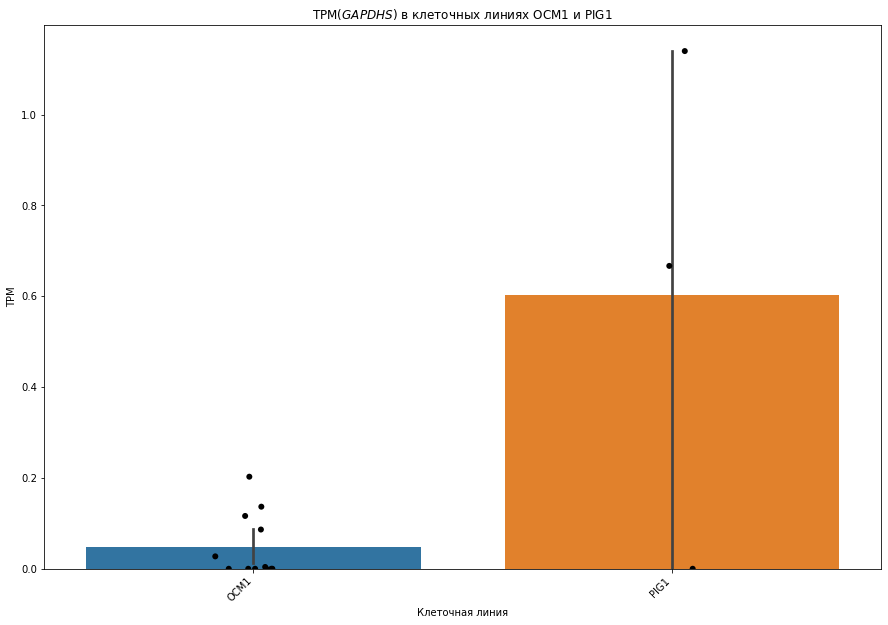

In [36]:
plt.figure(figsize=(15,10))
sns.barplot(data=tpmsum_ocm_G2, y=tpmsum_ocm_G2['GAPDHS'], x = tpmsum_ocm_G2.type)
sns.stripplot(data=tpmsum_ocm_G2, y=tpmsum_ocm_G2['GAPDHS'], x = tpmsum_ocm_G2.type, size=6, color='black')
#sns.stripplot(data=tpmsum, size=6, color='black')
plt.title("TPM($\it{GAPDHS}$) в клеточных линиях OCM1 и PIG1")
#plt.yscale('log')
plt.ylabel("TPM")
plt.xlabel("Клеточная линия")
plt.xticks(rotation=45, ha='right')
plt.show()

### PIG1

In [29]:
tpmsum_pig_G2 = pd.crosstab(G2_cl[G2_cl['type_of_tissue']=='PIG1'].sample_SRR, G2_cl[G2_cl['type_of_tissue']=='PIG1'].gene, values = G2_cl[G2_cl['type_of_tissue']=='PIG1'].TPM, aggfunc='sum')
tpmsum_pig_G2['norm'] = tpmsum_pig_G2['GAPDHS2']/tpmsum_pig_G2['GAPDH2']
tpmsum_pig_G2

gene,GAPDH2,GAPDHS2,norm
sample_SRR,,,
SRR14683911_RNA-Seq_of_human_melanocytes_cell_line,4602.958496,0.0,0.0
SRR14683914_RNA-Seq_of_human_melanocytes_cell_line,4564.150879,0.0,0.0
SRR14683915_RNA-Seq_of_human_melanocytes_cell_line,4590.535645,0.0,0.0
